<html>
  <body>
    <header></header>
        <CENTER>
          <img src="https://professor.uvv.br/Content/img/logo-uvv.png" alt="UVV-LOGO" style = width="100px"; height="100px">
        </CENTER>
        <CENTER><b>DATA SCIENCE PROJECT</b></CENTER><br/>
        <CENTER><b>Rodrigo Fonseca Lopes</b></CENTER><br/>

LINK PARA SEU PRÓPRIO COLAB: Aqui

LINK PARA SEU PRÓPRIO GITHUB: [Repositório](https://github.com/rodrigofl-dev/TCC_DataScience)

LINK PARA SEU VÍDEO NO YOUTUBE: Aqui

<center>

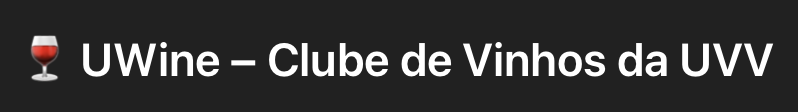

<center>

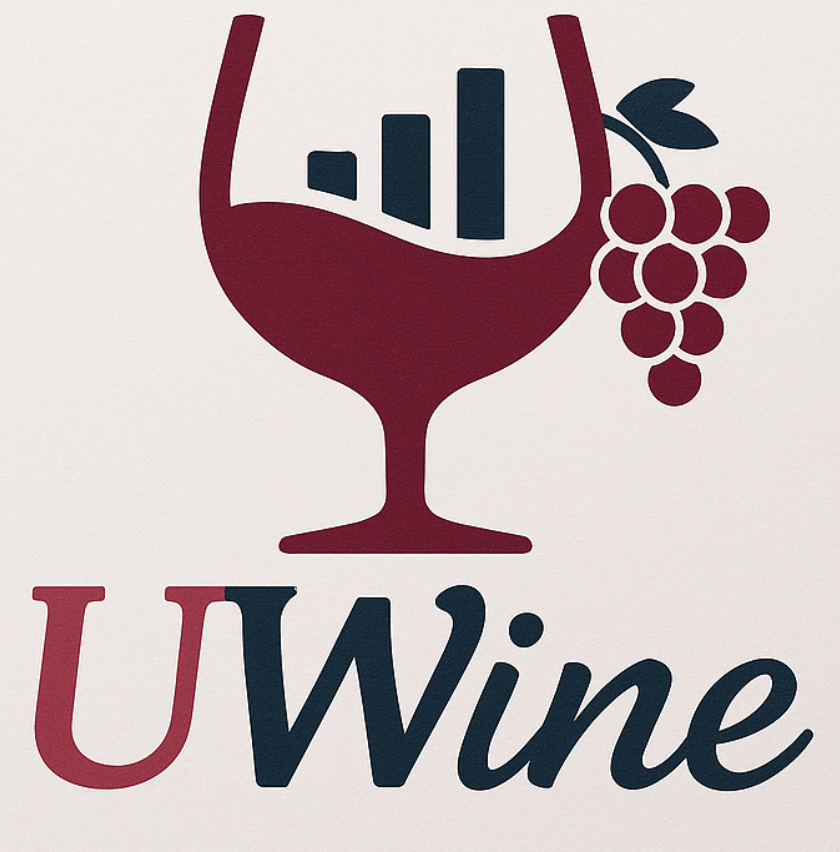

# **Cenário Fictício**:

Prezados(as) alunos(as),

É com entusiasmo que apresento a proposta do **Projeto de Conclusão de Curso (TCC)** para os estudantes do curso de Ciência de Dados da Universidade Vila Velha: o UWine – Clube de Vinhos da UVV.

A proposta do projeto consiste na análise de um Clube de Vinhos universitário fictício, com base em dados simulados, que será totalmente orientado por técnicas e práticas de Ciência de Dados.

Sendo assim, você foi designado como **Consultor em Ciência de Dados** ( ***Data Science Consultant*** ) para fazer uma análise completa dos dados dos clientes a partir de um conjunto de dados (Amostra) com mais de 1 milhão de notas fiscais (~ 350 Megabytes). Além disso, há uma entrada diária de aproximadamente umas 5000 novas notas fiscais no sistema.

O objetivo é permitir que cada consultor(a) percorra foco analíticos diferentes dentro do mesmo ecossistema de dados, aplicando modelos de machine learning supervisionado ou não supervisionado, análise preditiva, dashboards interativos, entre outros.

Para garantir organização, profundidade técnica e coerência metodológica no desenvolvimento do ***Projeto UWine***, adotaremos um workflow composto por cinco etapas principais, alinhadas às boas práticas da Ciência de Dados. Cada etapa representa um marco do processo analítico, permitindo que cada analista avance de forma estruturada do entendimento inicial dos dados até a entrega final dos insights.

# BIBLIOTECAS E FUNÇÕES E CÓDIGOS

In [16]:
# IMPORTS

import pandas as pd
import numpy as np

# Inferência Estatística x Aprendizado de Máquina
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import bootstrap
from sklearn.datasets import fetch_california_housing

# Visualização dos Dados
import matplotlib.pyplot as plt
import seaborn as sns

# Example of the Normality Test
from scipy.stats import skew, kurtosis, norm
from scipy.stats import anderson
from scipy.stats import shapiro
from scipy.stats import normaltest

# Example of the Correlation Tests
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from scipy.stats import chi2_contingency

# Parametric Statistical Hypothesis Tests

# Example of the Student's t-test
from scipy.stats import ttest_ind
# Example of the Paired Student's t-test
from scipy.stats import ttest_rel
# Example of the Analysis of Variance Test: ANOVA
from scipy.stats import f_oneway

# Nonparametric Statistical Hypothesis Tests

# Example of the Mann-Whitney U Test
from scipy.stats import mannwhitneyu
# Example of the Wilcoxon Signed-Rank Test
from scipy.stats import wilcoxon
# Example of the Kruskal-Wallis H Test
from scipy.stats import kruskal
# Example of the Friedman Test
from scipy.stats import friedmanchisquare

# Descrição dos Dados

#regiao = ['SUDESTE', 'SUL', 'CENTRO-OESTE', 'NORDESTE', 'NORTE']
#regiao = [1, 2, 3, 4, 5]

#sexo = ['FEMININO', 'MASCULINO']
#sexo = [1, 2]

#estado = ['SOLTEIRO', 'CASADO', 'DESQUITADO']
#estado = [1, 2, 3]

#conta = ['ESSENTIAL', 'VIP', 'PRIME']
#conta = [1, 2, 3]

REGIAO = {
    1: "SUDESTE",
    2: "SUL",
    3: "CENTRO-OESTE",
    4: "NORDESTE",
    5: "NORTE",
}

SEXO = {
    1: "FEMININO",
    2: "MASCULINO",
}

ESTADO_CIVIL = {
    1: "SOLTEIRO",
    2: "CASADO",
    3: "DIVORCIADO",
}

TIPO_CONTAS = {
    1: "ESSENTIAL",
    2: "VIP",
    3: "PRIME",
}

NOTA = {
    # Nota 1
    "Tive uma experiência ruim com a UVVine": 'NOTA 1',
    "Produto chegou atrasado na UVVine": 'NOTA 1',
    "Não gostei do atendimento na UVVine": 'NOTA 1',
    "Senti que faltou qualidade no atendimento da UVVine": 'NOTA 1',

    # Nota 2
    "Serviço deixou a desejar na UVVine": 'NOTA 2',
    "Foi aceitável, esperava mais da UVVine": 'NOTA 2',
    "Razoável, com margem de melhora no preço médio da UVVine": 'NOTA 2',
    "Atendimento comum, poderia melhorar em cordialidade a UVVine": 'NOTA 2',
    "Experiência regular, não atendeu a política de cashback da UVVine": 'NOTA 2',
    "Nada demais, serviço regular na UVVine": 'NOTA 2',

    # Nota 3
    "Foi indiferente minha experiência com a UVVine": 'NOTA 3',
    "Compro exponenciamente, opinião neutra sobre UVVine": 'NOTA 3',
    "Não tenho muito a dizer sobre a UVVine": 'NOTA 3',
    "Nada digno de nota com a UVVine": 'NOTA 3',
    "Sem opinião formada sobre a UVVine": 'NOTA 3',

    # Nota 4
    "Funcionou bem e me atendeu no prazo certo a UVVine": 'NOTA 4',
    "Entrega foi boa e rápida na UVVine": 'NOTA 4',
    "Fiquei satisfeito com o serviço da UVVine": 'NOTA 4',
    "Gostei do atendimento prestado pela UVVine": 'NOTA 4',
    "Serviço eficiente, recomendo o clube:  UVVine": 'NOTA 4',

    # Nota 5
    "Ótimo! Tudo ocorreu maravilhosamente bem com a  UVVine": 'NOTA 5',
    "Produto perfeito, chegou antes do prazo de previsão. Top demais a UVVine": 'NOTA 5',
    "Serviço impecável, adorei o clube:  UVVine": 'NOTA 5',
    "Excelente experiência, recomendo muito a UVVine": 'NOTA 5',
    "Superou expectativas o atendimento na UVVine": 'NOTA 5',
}

In [17]:
# Load Dataset

#df = pd.read_csv('drive/MyDrive/table9.csv', index_col=0)
df = pd.read_csv('dataset/table9.csv', index_col=0)

In [18]:
# CORREÇÃO DO ERRO ETL:
def troca_rotulos(df: pd.DataFrame) -> pd.DataFrame:
    colunas = list(df.columns)
    colunas[4], colunas[5] = colunas[5], colunas[4]
    df.columns = colunas
    return df

df = troca_rotulos(df)
df = df.drop(['index'], axis=1)

# Mapeando tipos de conta
df['NOME TIPO DA CONTA'] = df.loc[:,'TIPO DA CONTA'].apply(lambda x: TIPO_CONTAS[x])
df['NOME REGIÃO'] = df.loc[:,'REGIÃO'].apply(lambda x: REGIAO[x])
df['NOME SEXO'] = df.loc[:,'SEXO'].apply(lambda x: SEXO[x])
df['NOME ESTADO CIVIL'] = df.loc[:,'ESTADO CIVIL'].apply(lambda x: ESTADO_CIVIL[x])
df['NOTA OPINIÃO'] = df.loc[:,'OPINIÃO DO CLIENTE'].apply(lambda x: NOTA[x])
df['NOTA OPINIÃO NUM'] = df['NOTA OPINIÃO'].str.replace('NOTA ','', regex=False).astype(int)

In [19]:
def SE(dataset):
  '''
    HELP: Standart Error (Erro Padrão)
    O Erro-Padrão é uma métrica única que resume a variabilidade na distribuição de amostragem para uma estatística.
    Ele pode ser estimado utilizando uma estatística baseada no desvio-padrão (Sigma) dos valores da amostra e no tamanho de amostra N:
  '''
  return dataset.std() / (len(dataset) ** 0.5)


def statistic(_dataset):
  """
  DOCSTRING:
  Describe (without count) + Insert range: max - min
  """
  _describe = _dataset.describe()
  _describe = _describe.drop('count')
  _size = _describe.shape
  _describe.loc['range'] = _describe['max'] - _describe['min']
  _describe.loc['mode'] = stats.mode(_dataset, keepdims = False)[0]
  _describe = np.around(_describe.sort_values(), 2)
  return _describe


def PlotarStatistic(dataset, yLabel = None, title = "ESTATÍSTICA DESCRITIVA DO DATASET"):

  _describe = statistic(dataset)

  # Símbolos da estatística estimada da população
  mean_mu = 'MÉDIA:  $\\overline{\mu}$ = '
  mean_mu += f'{_describe["mean"]: .2f}'

  median_mu = 'MEDIANA: $\\tilde{\mu}$ = '
  median_mu += f'{_describe["50%"]: .2f}'

  mode_mu = 'MODA: $\\hat{\mu}$ = '
  mode_mu += f'{_describe["mode"]: .2f}'

  enter = '\n'

  label = mean_mu + enter + median_mu + enter + mode_mu
  dataset.agg(statistic).plot(figsize = [15, 6], label='MEDIDAS DE RESUMO: ')
  plt.plot(list(_describe.index).index('mean'), _describe["mean"], 'D', label=mean_mu)
  plt.plot(list(_describe.index).index('50%'), _describe["50%"], 'D', label=median_mu)
  plt.plot(list(_describe.index).index('mode'), _describe["mode"], 'D', label=mode_mu)

  plt.title(f'{title}')
  plt.legend()
  plt.ylabel(yLabel)
  plt.show()
  print('ESTATÍSTICA DESCRITIVA DO DATASET:')
  print(_describe)


def Bootstrap_Distribution(data, metric = np.mean, bins = 25, title = 'Bootstrap Distribution'):
  rng = np.random.default_rng()
  data = (data,)  # samples must be in a sequence
  res = bootstrap(data, metric, confidence_level = 0.90, random_state = rng)
  fig, ax = plt.subplots()
  ax.hist(res.bootstrap_distribution, bins)
  ax.set_title(f'{title}')
  ax.set_xlabel('Statistic Value')
  ax.set_ylabel('Frequency')
  #print(ax.get_ylim())
  plt.vlines(res.confidence_interval.low, 0, ax.get_ylim()[1], colors='red', linestyles = '--')
  plt.vlines(res.confidence_interval.high, 0, ax.get_ylim()[1], colors='red', linestyles = '--')
  plt.show()
  print('INTERVALO DE CONFIANÇA:')
  print(f'LOW : R$ {res.confidence_interval.low: .2f}')
  print(f'HIGH: R$ {res.confidence_interval.high: .2f}')
  print(f'SE. : R$ {res.standard_error: .2f}')
  # return res


def analisar_distribuicao(df, coluna):
    """
    Plota a distribuição da coluna e exibe métricas:
    Assimetria, Curtose, Coeficiente de Variação e p-value do teste de normalidade.
    """
    dados = df[coluna]

    # Calcula métricas
    assimetria = skew(dados)
    curtose_val = kurtosis(dados)
    coef_var = np.std(dados) / np.mean(dados)

    # Teste de normalidade (anderson)
    result = anderson(dados)

    # Plot
    plt.figure(figsize=(8,5))
    sns.histplot(dados, kde=True, stat="density", color="skyblue", edgecolor="black")

    # Curva normal teórica
    mu, sigma = np.mean(dados), np.std(dados)
    x = np.linspace(min(dados), max(dados), 100)
    plt.plot(x, norm.pdf(x, mu, sigma), color="red", linewidth=2, label="Normal teórica")

    # Título e eixos
    plt.title(f"Distribuição da coluna: {coluna}")
    plt.xlabel(coluna)
    plt.ylabel("Densidade")

    # Texto com métricas
    texto_metrics = (
        f"Assimetria: {assimetria:.2f}\n"
        f"Curtose: {curtose_val:.2f}\n"
        f"Coef. Variação: {coef_var:.2f}\n"
        f"Statistic Anderson: {result.statistic:.3f}"
    )
    plt.legend(title=texto_metrics)
    plt.show()

    '''
    return {
        "Assimetria": assimetria,
        "Curtose": curtose_val,
        "Coef_Variacao": coef_var,
        "p_value": p_value
    }
    '''
  

def remover_outliers_df(df: pd.DataFrame, upper_only=False):
    """
      Remove outliers de todas as colunas numéricas de um DataFrame usando o método do IQR.

      Parâmetros:
      df (pd.DataFrame): DataFrame contendo colunas numéricas.
      upper_only (bool): Se True, remove apenas outliers acima do limite superior.
                        Se False, remove outliers acima e abaixo.

      Retorna:
      - pd.DataFrame: DataFrame sem outliers
      - dict: Quantidade de outliers removidos por coluna
    """
    df_filtrado = df.copy()
    outliers_removidos = {}

    for coluna in df.select_dtypes(include=["number"]).columns:
        Q1 = df[coluna].quantile(0.25)
        Q3 = df[coluna].quantile(0.75)
        IQR = Q3 - Q1

        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        if upper_only:
            filtro = df_filtrado[coluna] <= limite_superior
        else:
            filtro = (df_filtrado[coluna] >= limite_inferior) & (df_filtrado[coluna] <= limite_superior)

        qtd_outliers = len(df_filtrado) - filtro.sum()
        outliers_removidos[coluna] = qtd_outliers

        # Mantém apenas as linhas que não são outliers nessa coluna
        df_filtrado = df_filtrado[filtro]

    return df_filtrado, outliers_removidos



In [20]:
# Separando dataset entre os tipos de conta
df_essential = df[df['NOME TIPO DA CONTA'] == "ESSENTIAL"]
df_vip = df[df['NOME TIPO DA CONTA'] == "VIP"]
df_prime = df[df['NOME TIPO DA CONTA'] == "PRIME"]

df_essential['TOTAL (R$)'].count(), df_vip['TOTAL (R$)'].count(), df_prime['TOTAL (R$)'].count()

(750000, 220000, 150000)

In [21]:
df.head(3)

NOTA FISCAL  REGIÃO  SEXO  TIPO DA CONTA  ESTADO CIVIL  RENDA BRUTO (R$)  \
0      2484848       1     2              3             2          14822.84   
1      8433233       4     2              1             1           1659.14   
2      1065576       3     2              1             2           1852.10   

                                  OPINIÃO DO CLIENTE    alcohol  malic_acid  \
0  Compro exponenciamente, opinião neutra sobre U...  13.462251    3.096625   
1  Compro exponenciamente, opinião neutra sobre U...  13.138451    4.068354   
2     Foi indiferente minha experiência com a UVVine  12.955913    0.007623   

        ash  ...       hue  od280/od315_of_diluted_wines     proline  \
0  2.283004  ...  1.492145                      2.861372  718.060568   
1  2.568033  ...  1.051308                      2.437510  858.583178   
2  2.062071  ...  1.024379                      2.926601  677.286295   

   TOTAL (R$)  NOME TIPO DA CONTA   NOME REGIÃO  NOME SEXO  NOME ESTADO CIVIL  \
0    15121.29               PRIME       SUDESTE  MASCULINO             CASADO   
1     1511.81           ESSENTIAL      NORDESTE  MASCULINO           SOLTEIRO   
2     1854.09           ESSENTIAL  CENTRO-OESTE  MASCULINO             CASADO   

   NOTA OPINIÃO  NOTA OPINIÃO NUM  
0        NOTA 3                 3  
1        NOTA 3                 3  
2        NOTA 3                 3  

[3 rows x 27 columns]

# Workflow: Detalhamento das Atividades

## Atividade A1 ([Link](https://colab.research.google.com/drive/1_YGamH-qOWSNaCKG5kVlLiZPuXv5lT34?usp=sharing)): Estratificação amostral da população

### Atividade A1.1: Determinar o tamanho da amostra

In [ ]:
# Erro-Padrão Médio por TIPO DA CONTA
def SE_essential():
  """
  Foi escolhido utilizar amostragens de 1000 em 1000 registros devido ao tamanho do dataset.
  O tempo de processamento estava muito elevado para realizar de 100 em 100, além de o erro-padrão não mudar tanto entre 100.000 e 100.100, por exemplo.
  """
  array_se = np.zeros(750, dtype=float)
  j = 0
  for i in range(100, 750_100, 1000):
    tb = df_essential.sample(n = i, replace = False, random_state=j)['TOTAL (R$)']
    array_se[j] = SE(tb)
    j += 1
  x = np.arange(1, 751, 1)
  y = array_se

  fig, axes = plt.subplots(1, 2, figsize=(14, 5))

  axes[0].plot(x, y)
  axes[0].set_title(f"Erro-Padrão Médio - Contas ESSENTIAL: R${np.mean(array_se): .2f}")
  axes[0].set_ylabel('ERRO PADRÃO (R$)')
  axes[0].set_xlabel('TAMANHO DA AMOSTRA * 1000')
  axes[0].hlines(np.mean(array_se), 0, 750, colors='red', linestyles = '--')

  axes[1].plot(x[178:180], y[178:180])
  axes[1].set_title(f"Visão aproximada")
  axes[1].set_ylabel('ERRO PADRÃO (R$)')
  axes[1].set_xlabel('TAMANHO DA AMOSTRA * 1000')
  axes[1].hlines(np.mean(array_se), 178, 180, colors='red', linestyles = '--')
  
  plt.tight_layout()
  plt.show()


def SE_vip():
  """
  Foi escolhido utilizar amostragens de 1000 em 1000 registros devido ao tamanho do dataset.
  O tempo de processamento estava muito elevado para realizar de 100 em 100, além de o erro-padrão não mudar tanto entre 100.000 e 100.100, por exemplo.
  """
  array_se = np.zeros(220, dtype=float)
  j = 0
  for i in range(100, 220_100, 1000):
    tb = df_vip.sample(n = i, replace = False, random_state=j)['TOTAL (R$)']
    array_se[j] = SE(tb)
    j += 1
  x = np.arange(1, 221, 1)
  y = array_se

  fig, axes = plt.subplots(1, 2, figsize=(14, 5))

  axes[0].plot(x, y)
  axes[0].set_title(f"Erro-Padrão Médio - Contas VIP: R${np.mean(array_se): .2f}")
  axes[0].set_ylabel('ERRO PADRÃO (R$)')
  axes[0].set_xlabel('TAMANHO DA AMOSTRA * 1000')
  axes[0].hlines(np.mean(array_se), 0, 220, colors='red', linestyles = '--')

  axes[1].plot(x[50:52], y[50:52])
  axes[1].set_title(f"Visão aproximada")
  axes[1].set_ylabel('ERRO PADRÃO (R$)')
  axes[1].set_xlabel('TAMANHO DA AMOSTRA * 1000')
  axes[1].hlines(np.mean(array_se), 51, 52, colors='red', linestyles = '--')

  plt.tight_layout()
  plt.show()


def SE_prime():
  """
  Foi escolhido utilizar amostragens de 1000 em 1000 registros devido ao tamanho do dataset.
  O tempo de processamento estava muito elevado para realizar de 100 em 100, além de o erro-padrão não mudar tanto entre 100.000 e 100.100, por exemplo.
  """
  array_se = np.zeros(150, dtype=float)
  j = 0
  for i in range(100, 150_100, 1000):
    tb = df_prime.sample(n = i, replace = False, random_state=j)['TOTAL (R$)']
    array_se[j] = SE(tb)
    j += 1
  x = np.arange(1, 151, 1)
  y = array_se

  fig, axes = plt.subplots(1, 2, figsize=(14, 5))

  axes[0].plot(x, y)
  axes[0].set_title(f"Erro-Padrão Médio - Contas PRIME: R${np.mean(array_se): .2f}")
  axes[0].set_ylabel('ERRO PADRÃO (R$)')
  axes[0].set_xlabel('TAMANHO DA AMOSTRA * 1000')
  axes[0].hlines(np.mean(array_se), 0, 150, colors='red', linestyles = '--')

  axes[1].plot(x[33:35], y[33:35])
  axes[1].set_title(f"Visão aproximada")
  axes[1].set_ylabel('ERRO PADRÃO (R$)')
  axes[1].set_xlabel('TAMANHO DA AMOSTRA * 1000')
  axes[1].hlines(np.mean(array_se), 33, 35, colors='red', linestyles = '--')

  plt.tight_layout()
  plt.show()


def AtividadeA1_1():
  """
  HELP: Solução da etapa A1.1
  A função calcula e printa resultados das seguintes tarefas:
    - Erro-Padrão Médio por TIPO DA CONTA;
    - Intervalo de Confiança por TIPO DA CONTA;
    - Gráfico da Análise Bootstrap por TIPO DA CONTA;
    - Gráfico da Distribuição Normal (com Coeficiente de Variação (CV), Assimetria e Curtose) por TIPO DA CONTA;
    - Gráfico da Estatística Descritiva por TIPO DA CONTA.
  """
  print("\nErro-Padrão Médio por TIPO DA CONTA\n")
  SE_essential()
  print("Número ideal de amostras entre 179.000 e 179.500\n")
  SE_vip()
  print("Número ideal de amostras entre 51.700 e 52.000\n")
  SE_prime()
  print("Número ideal de amostras entre 34.000 e 34.500\n")

  print("\n\nIntervalo de Confiança por TIPO DA CONTA")
  
  Bootstrap_Distribution(df_essential.sample(n=5000, replace=False)['TOTAL (R$)'], title='Bootstrap Distribution - ESSENTIAL')
  print(" ")
  Bootstrap_Distribution(df_vip.sample(n=3000, replace=False)['TOTAL (R$)'], title='Bootstrap Distribution - VIP')
  print(" ")
  Bootstrap_Distribution(df_prime.sample(n=2000, replace=False)['TOTAL (R$)'], title='Bootstrap Distribution - PRIME')

  print("\n\nGráfico da Distribuição Normal por TIPO DA CONTA\n")
  essential_sample = df_essential.sample(n=179250, replace=False)
  essential_sample, _ = remover_outliers_df(essential_sample)

  vip_sample = df_vip.sample(n=51900, replace=False)
  vip_sample, _ = remover_outliers_df(vip_sample)

  prime_sample = df_prime.sample(n=34250, replace=False)
  prime_sample, _ = remover_outliers_df(prime_sample)

  print("ESSENTIAL")
  analisar_distribuicao(essential_sample,'TOTAL (R$)')
  print("\nVIP")
  analisar_distribuicao(vip_sample,'TOTAL (R$)')
  print("\nPRIME")
  analisar_distribuicao(prime_sample,'TOTAL (R$)')

  print("\n\nGráfico da Estatística Descritiva por TIPO DA CONTA\n")
  print("Contas Essential")
  PlotarStatistic(df_essential['TOTAL (R$)'], yLabel = 'TOTAL DE GASTOS (R$)', title = 'ESTATÍSTICA DESCRITIVA - Contas Essential')
  print("\n\nContas VIP")
  PlotarStatistic(df_vip['TOTAL (R$)'], yLabel = 'TOTAL DE GASTOS (R$)', title = 'ESTATÍSTICA DESCRITIVA - Contas VIP')
  print("\n\nContas Prime")
  PlotarStatistic(df_prime['TOTAL (R$)'], yLabel = 'TOTAL DE GASTOS (R$)', title = 'ESTATÍSTICA DESCRITIVA - Contas Prime')
  print(" ")




Erro-Padrão Médio por TIPO DA CONTA



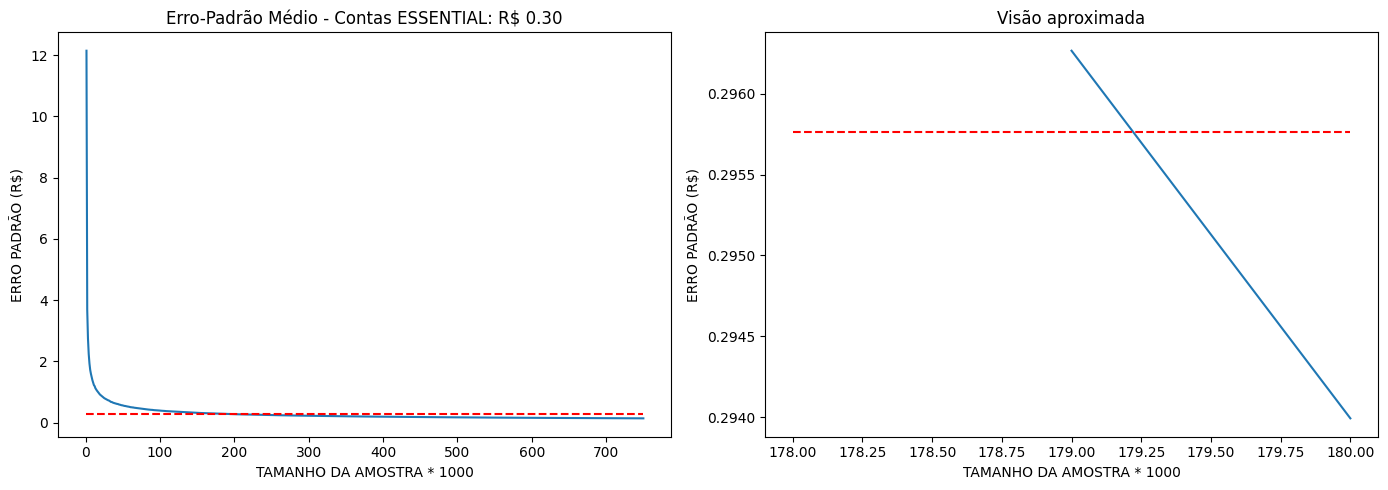

Número ideal de amostras entre 179.000 e 179.500



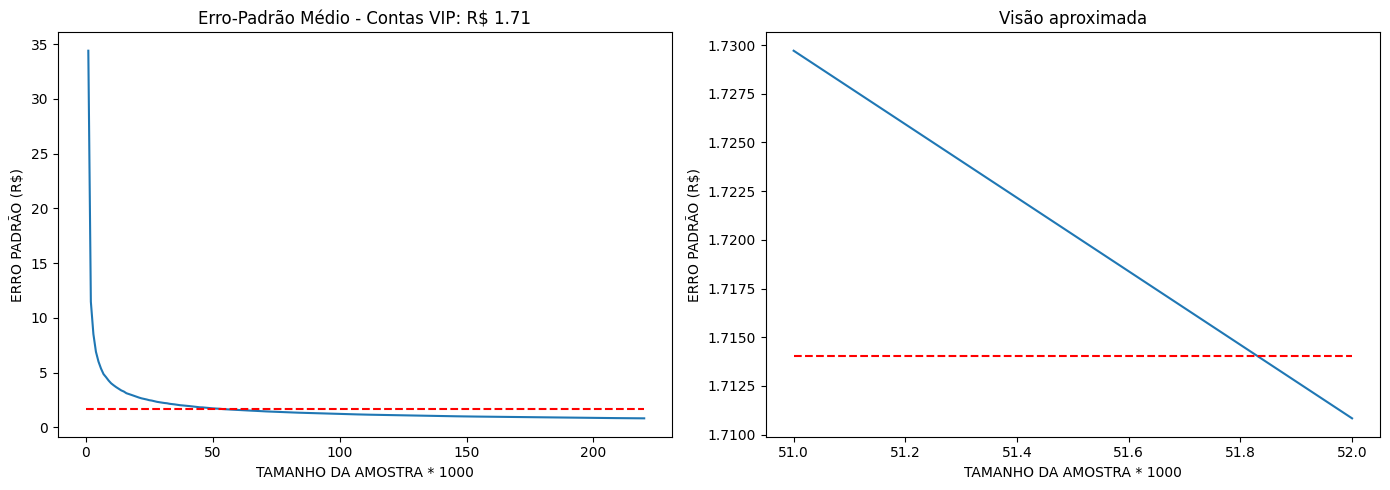

Número ideal de amostras entre 51.700 e 52.000



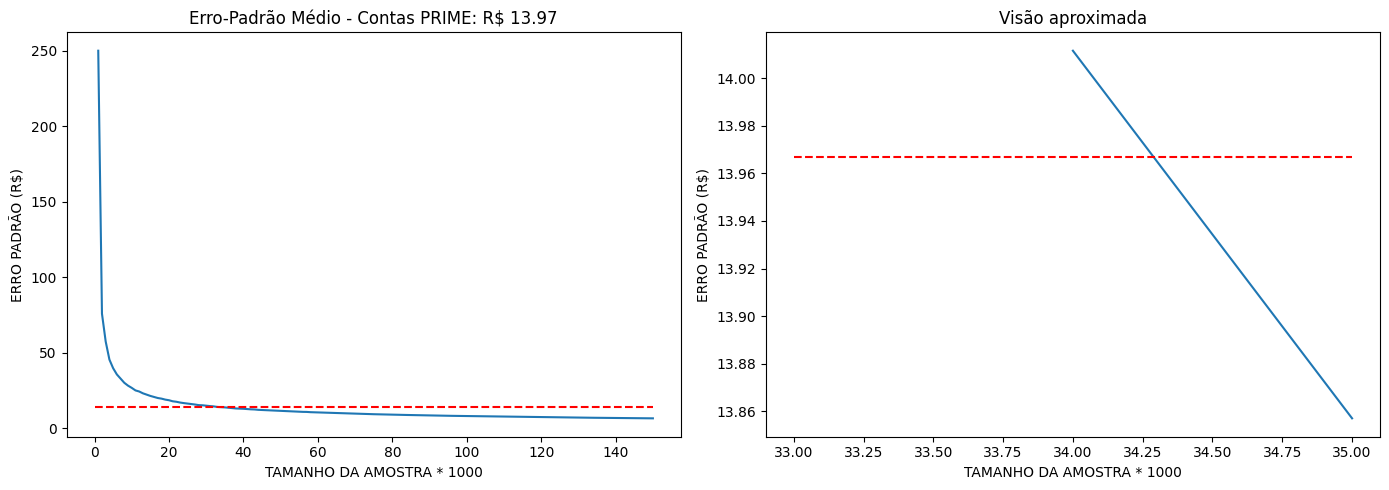

Número ideal de amostras entre 34.000 e 34.500



Intervalo de Confiança por TIPO DA CONTA


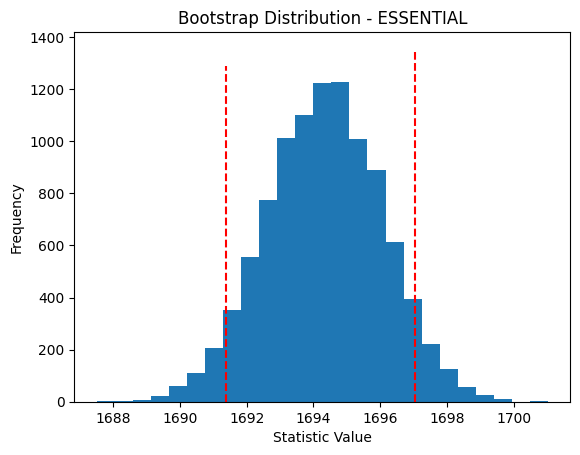

INTERVALO DE CONFIANÇA:
LOW : R$  1691.38
HIGH: R$  1697.04
SE. : R$  1.73
 


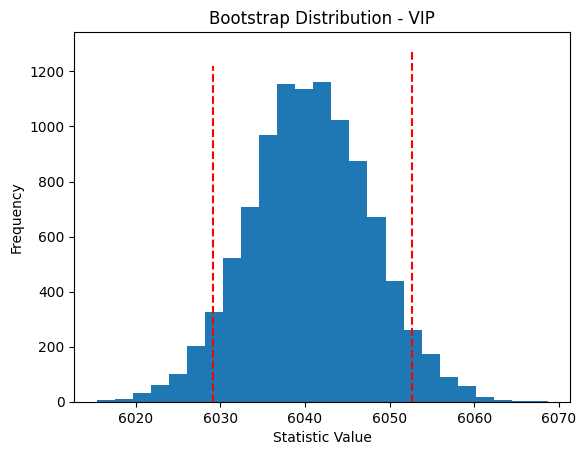

INTERVALO DE CONFIANÇA:
LOW : R$  6029.17
HIGH: R$  6052.66
SE. : R$  7.14
 


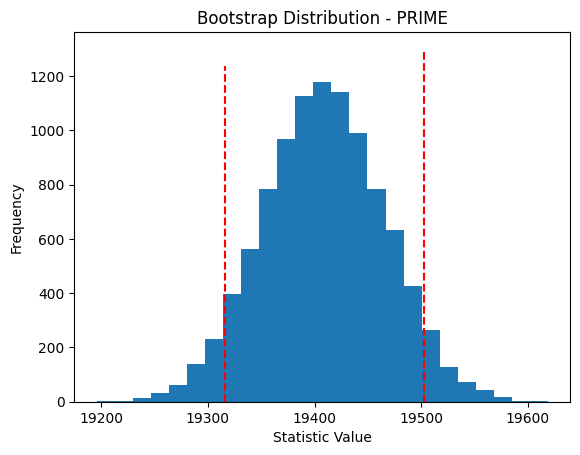

INTERVALO DE CONFIANÇA:
LOW : R$  19315.99
HIGH: R$  19502.21
SE. : R$  56.86


Gráfico da Distribuição Normal por TIPO DA CONTA

ESSENTIAL


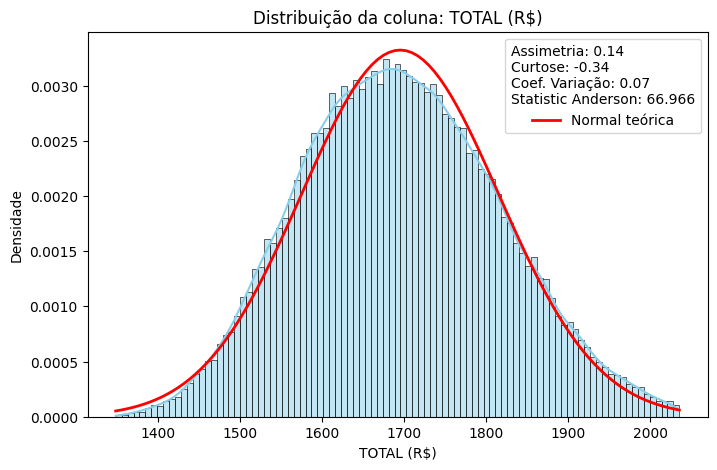


VIP


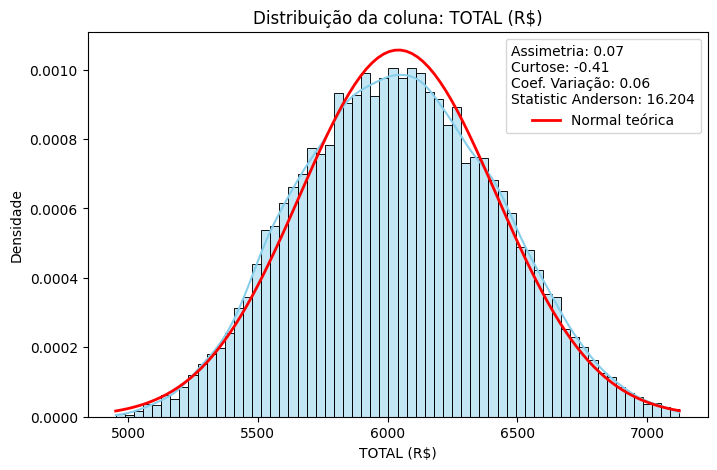


PRIME


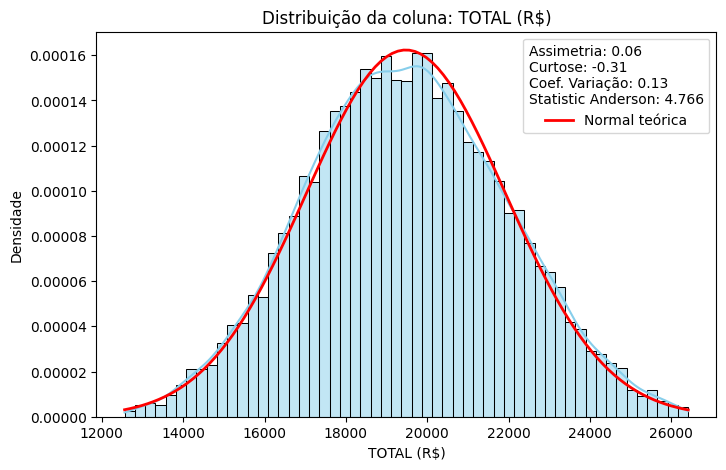



Gráfico da Estatística Descritiva por TIPO DA CONTA

Contas Essential


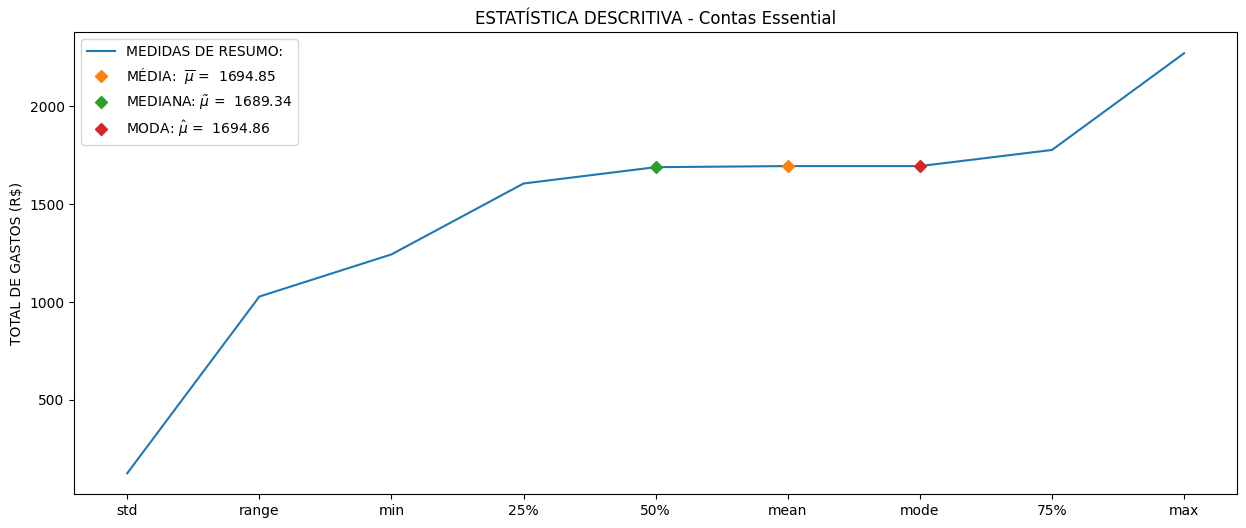

ESTATÍSTICA DESCRITIVA DO DATASET:
std       124.74
range    1027.98
min      1243.50
25%      1605.86
50%      1689.34
mean     1694.85
mode     1694.86
75%      1777.28
max      2271.48
Name: TOTAL (R$), dtype: float64


Contas VIP


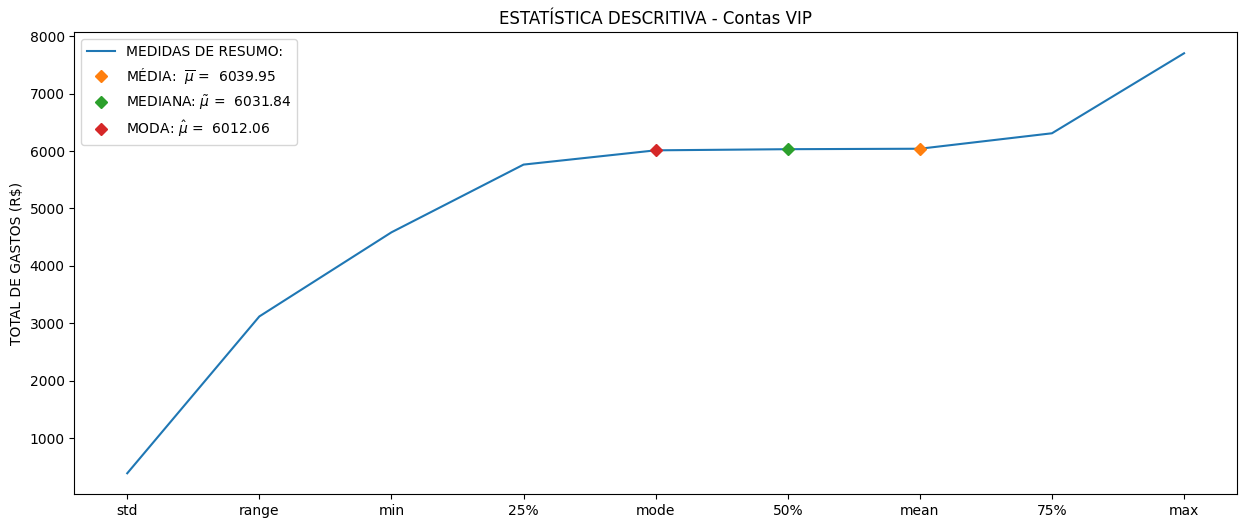

ESTATÍSTICA DESCRITIVA DO DATASET:
std       386.66
range    3118.71
min      4583.86
25%      5763.62
mode     6012.06
50%      6031.84
mean     6039.95
75%      6309.13
max      7702.57
Name: TOTAL (R$), dtype: float64


Contas Prime


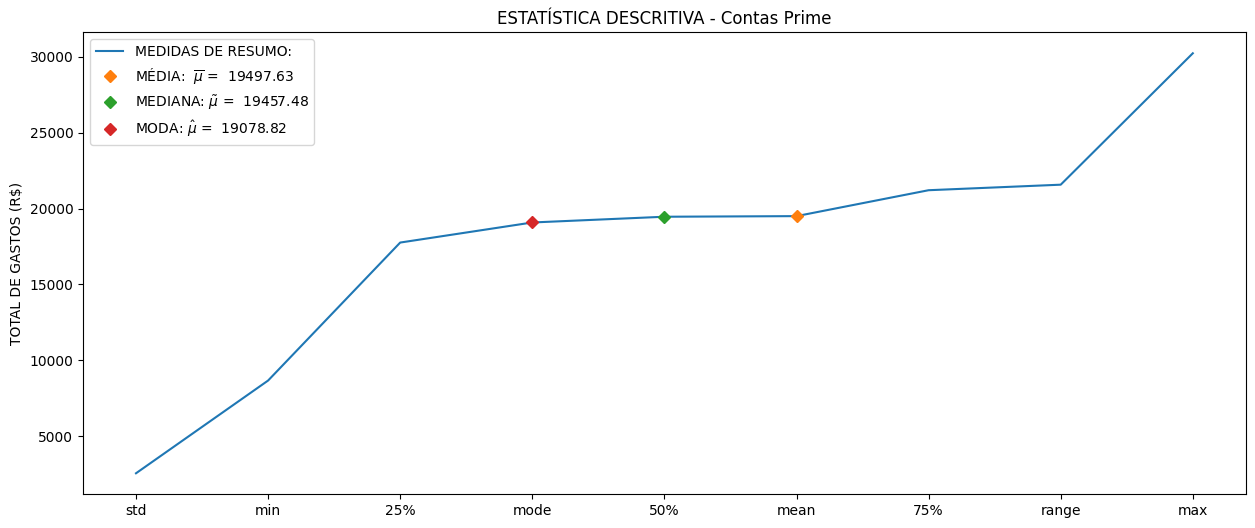

ESTATÍSTICA DESCRITIVA DO DATASET:
std       2548.76
min       8661.06
25%      17755.62
mode     19078.82
50%      19457.48
mean     19497.63
75%      21205.39
range    21569.89
max      30230.95
Name: TOTAL (R$), dtype: float64
 


In [23]:
AtividadeA1_1()

In [24]:
help(AtividadeA1_1)

Help on function AtividadeA1_1 in module __main__:

AtividadeA1_1()
    HELP: Solução da etapa A1.1
    A função calcula e printa resultados das seguintes tarefas:
      - Erro-Padrão Médio por TIPO DA CONTA;
      - Intervalo de Confiança por TIPO DA CONTA;
      - Gráfico da Análise Bootstrap por TIPO DA CONTA;
      - Gráfico da Distribuição Normal (com Coeficiente de Variação (CV), Assimetria e Curtose) por TIPO DA CONTA;
      - Gráfico da Estatística Descritiva por TIPO DA CONTA.



### Atividade A1.2: Analisar os outliers

In [25]:
def analisar_outliers(df, coluna):
    """
    Analisa outliers usando método do IQR (Boxplot).
    Retorna limites, contagem de outliers e opcionalmente um df sem outliers.
    """
    dados = df[coluna]
    
    # Quartis
    Q1 = np.percentile(dados, 25)
    Q3 = np.percentile(dados, 75)
    IQR = Q3 - Q1
    
    # Limites
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # Contagem de outliers
    outliers_inferior = (dados < limite_inferior).sum()
    outliers_superior = (dados > limite_superior).sum()
    
    # Gráfico Boxplot
    plt.figure(figsize=(8,5))
    sns.boxplot(x=dados, color="skyblue")
    plt.title(f"Boxplot - {coluna}")
    plt.axvline(limite_inferior, color="red", linestyle="--", label="Limite inferior")
    plt.axvline(limite_superior, color="green", linestyle="--", label="Limite superior")
    plt.legend()
    plt.show()
    
    print(f"Limite inferior: {limite_inferior:.2f}")
    print(f"Limite superior: {limite_superior:.2f}")
    print(f"Quantidade de amostras abaixo do limite inferior: {outliers_inferior}")
    print(f"Quantidade de amostras acima do limite superior: {outliers_superior}")
    df_sem_outliers = df[(df[coluna] >= limite_inferior) & (df[coluna] <= limite_superior)]
    print(f"Shape original: {df.shape}")
    print(f"Shape sem outliers: {df_sem_outliers.shape}")
    print(" ")
    print(f"Valor mínimo dos outliers abaixo do limite: {df[df[coluna] < limite_inferior][coluna].min()}")
    print(f"Valor máximo dos outliers acima do limite: {df[df[coluna] > limite_superior][coluna].max()}")


def remover_outliers(df):
    # Quartis
    Q1 = np.percentile(df['TOTAL (R$)'], 25)
    Q3 = np.percentile(df['TOTAL (R$)'], 75)
    IQR = Q3 - Q1
    
    # Limites
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    return df[(df['TOTAL (R$)'] >= limite_inferior) & (df['TOTAL (R$)'] <= limite_superior)]


def AtividadeA1_2():
    """
    HELP: Solução da etapa A1.2
    A função calcula e printa resultados das seguintes tarefas:
        - Boxsplot
        - Limites inferior e superior
        - Quantidade de amostras acima do Limite superior
        - Quantidade de amostras abaixo do Limite inferior
        - Dropar os outliers ?
    """
    
    print("CONTAS ESSENTIAL")
    analisar_outliers(df_essential,'TOTAL (R$)')
    print("\n\nCONTAS VIP")
    analisar_outliers(df_vip,'TOTAL (R$)')
    print("\n\nCONTAS PRIME")
    analisar_outliers(df_prime,'TOTAL (R$)')



CONTAS ESSENTIAL


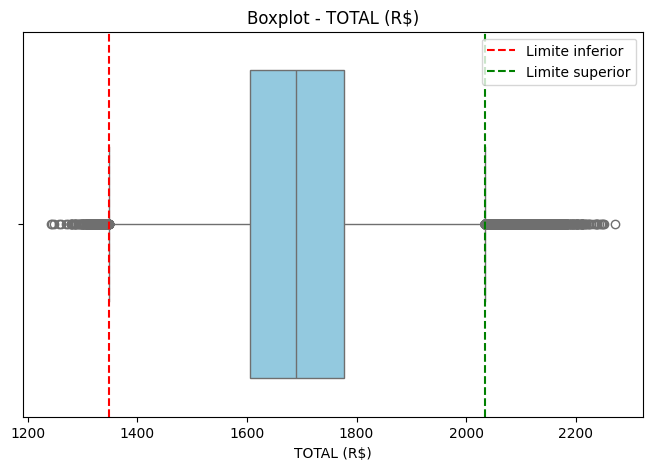

Limite inferior: 1348.73
Limite superior: 2034.41
Quantidade de amostras abaixo do limite inferior: 340
Quantidade de amostras acima do limite superior: 4134
Shape original: (750000, 27)
Shape sem outliers: (745526, 27)
 
Valor mínimo dos outliers abaixo do limite: 1243.5
Valor máximo dos outliers acima do limite: 2271.48


CONTAS VIP


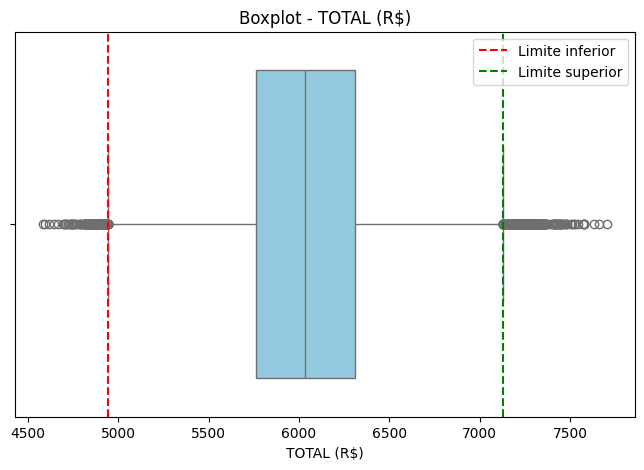

Limite inferior: 4945.35
Limite superior: 7127.40
Quantidade de amostras abaixo do limite inferior: 166
Quantidade de amostras acima do limite superior: 428
Shape original: (220000, 27)
Shape sem outliers: (219406, 27)
 
Valor mínimo dos outliers abaixo do limite: 4583.86
Valor máximo dos outliers acima do limite: 7702.57


CONTAS PRIME


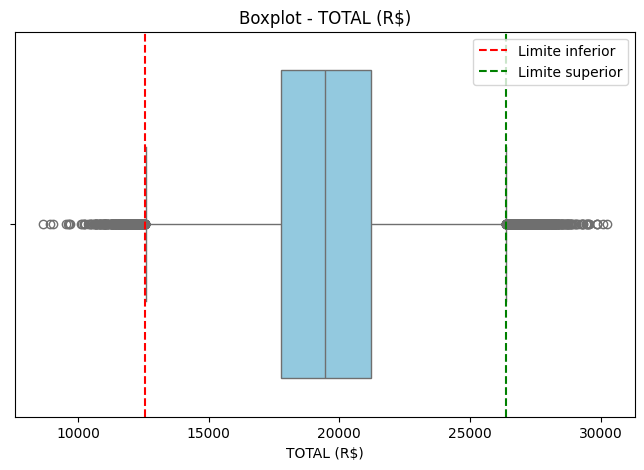

Limite inferior: 12580.97
Limite superior: 26380.05
Quantidade de amostras abaixo do limite inferior: 388
Quantidade de amostras acima do limite superior: 649
Shape original: (150000, 27)
Shape sem outliers: (148963, 27)
 
Valor mínimo dos outliers abaixo do limite: 8661.06
Valor máximo dos outliers acima do limite: 30230.95


In [26]:
AtividadeA1_2()

In [27]:
help(AtividadeA1_2)

Help on function AtividadeA1_2 in module __main__:

AtividadeA1_2()
    HELP: Solução da etapa A1.2
    A função calcula e printa resultados das seguintes tarefas:
        - Boxsplot
        - Limites inferior e superior
        - Quantidade de amostras acima do Limite superior
        - Quantidade de amostras abaixo do Limite inferior
        - Dropar os outliers ?



Não me parece ser necessário dropar os outliers pois os mesmos não tem valores tão altos, tanto em quantidade quanto em valor da variável analisada.
No entanto, na célula abaixo será criado os datasets sem outliers para serem usados em comparação nas demais análises do projeto.

In [28]:
df_essential_clean = remover_outliers(df_essential)
df_vip_clean = remover_outliers(df_vip)
df_prime_clean = remover_outliers(df_prime)

### Atividade A1.3: Testes de Hipóteses ([Link](https://colab.research.google.com/drive/1_YGamH-qOWSNaCKG5kVlLiZPuXv5lT34?usp=sharing))

OBS: A mensagem de warning do Shapiro (N > 5000) foi suprimida para deixar a saída mais limpa.

In [29]:
import warnings

warnings.filterwarnings("ignore", message=".*scipy.stats.shapiro.*")

def cria_amostras(tipo_conta = None):
    if tipo_conta == 'ESSENTIAL':
        # Número ideal de amostras entre 179.000 e 179.500
        sample1 = df_essential.sample(n=179250, replace=False)['TOTAL (R$)']
        sample2 = df_essential.sample(n=179250, replace=False)['TOTAL (R$)']
        sample1_clean = df_essential_clean.sample(n=179250, replace=False)['TOTAL (R$)']
        sample2_clean = df_essential_clean.sample(n=179250, replace=False)['TOTAL (R$)']
        return sample1,sample2,sample1_clean,sample2_clean
    
    elif tipo_conta == 'VIP':
        # Número ideal de amostras entre 51.700 e 52.000
        sample1 = df_vip.sample(n=51900, replace=False)['TOTAL (R$)']
        sample2 = df_vip.sample(n=51900, replace=False)['TOTAL (R$)']
        sample1_clean = df_vip_clean.sample(n=51900, replace=False)['TOTAL (R$)']
        sample2_clean = df_vip_clean.sample(n=51900, replace=False)['TOTAL (R$)']
        return sample1,sample2,sample1_clean,sample2_clean
    
    elif tipo_conta == 'PRIME':
        # Número ideal de amostras entre 34.000 e 34.500
        sample1 = df_prime.sample(n=34250, replace=False)['TOTAL (R$)']
        sample2 = df_prime.sample(n=34250, replace=False)['TOTAL (R$)']
        sample1_clean = df_prime_clean.sample(n=34250, replace=False)['TOTAL (R$)']
        sample2_clean = df_prime_clean.sample(n=34250, replace=False)['TOTAL (R$)']
        return sample1,sample2,sample1_clean,sample2_clean
    
    else:
        return None,None,None,None


def Normality_Test(data):
	result = anderson(data)
	print(f'DISTRIBUIÇÃO AMOSTRAL: stat = {result.statistic:.3f}')
	for i in range(len(result.critical_values)):
		sl, cv = result.significance_level[i], result.critical_values[i]
		if result.statistic < cv:
			print(f'Intervalo de Confiança ({sl:.1f} %): Probably Gaussian.')
		else:
			print(f'Intervalo de Confiança ({sl:.1f} %): Probably Not Gaussian.')


def AtividadeA1_3_1():
    """
    HELP: Solução da etapa A1.3.1
    A função calcula e printa resultados das seguintes tarefas:
        - Teste de Normalidade, usando: from scipy.stats import anderson
                                        from scipy.stats import shapiro
                                        from scipy.stats import normaltest
    """
    for x in TIPO_CONTAS:
        print(f"Conta: {TIPO_CONTAS[x]}")
        sample1,sample2,sample1_clean,sample2_clean = cria_amostras(TIPO_CONTAS[x])
        print("\n# Anderson #")
        print("Com outliers")
        Normality_Test(sample1)
        print("\nSem outliers")
        Normality_Test(sample1_clean)

        print("\n\n# Shapiro #")
        print("Com outliers")
        stat, p = shapiro(sample1)
        print('stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print('Probably Gaussian')
        else:
            print('Probably not Gaussian')
        print("\nSem outliers")
        stat, p = shapiro(sample1_clean)
        print('stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print('Probably Gaussian')
        else:
            print('Probably not Gaussian')
        
        print("\n\n# Agostino #")
        print("Com outliers")
        stat, p = normaltest(sample1)
        print('stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print('Probably Gaussian')
        else:
            print('Probably not Gaussian')
        print("\nSem outliers")
        stat, p = normaltest(sample1_clean)
        print('stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print('Probably Gaussian')
        else:
            print('Probably not Gaussian')
        
        print(" ")
        print(" ")


def AtividadeA1_3_2():
    """
    HELP: Solução da etapa A1.3.2
    A função calcula e printa resultados das seguintes tarefas:
        - Teste de Correlação, usando: from scipy.stats import pearsonr
                                       from scipy.stats import spearmanr
                                       from scipy.stats import kendalltau
                                       from scipy.stats import chi2_contingency
    """
    for x in TIPO_CONTAS:
        print(f"Conta: {TIPO_CONTAS[x]}")
        sample1,sample2,sample1_clean,sample2_clean = cria_amostras(TIPO_CONTAS[x])
        print("\n# Pearson #")
        print("Com outlier")
        stat, p = pearsonr(sample1, sample2)
        print('stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print('Probably independent')
        else:
            print('Probably dependent')
        print("\nSem outlier")
        stat, p = pearsonr(sample1_clean, sample2_clean)
        print('stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print('Probably independent')
        else:
            print('Probably dependent')

        print("\n# Spearman #")
        print("Com outlier")
        stat, p = spearmanr(sample1, sample2)
        print('stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print('Probably independent')
        else:
            print('Probably dependent')
        print("\nSem outlier")
        stat, p = spearmanr(sample1_clean, sample2_clean)
        print('stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print('Probably independent')
        else:
            print('Probably dependent')
        
        print("\n# Kendall #")
        print("Com outlier")
        stat, p = kendalltau(sample1, sample2)
        print('stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print('Probably independent')
        else:
            print('Probably dependent')
        print("\nSem outlier")
        stat, p = kendalltau(sample1_clean, sample2_clean)
        print('stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print('Probably independent')
        else:
            print('Probably dependent')

        print("\n# Chi-Squared #")
        print("Com outlier")
        stat, p, dof, expected = chi2_contingency(sample1, sample2)
        print('stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print('Probably independent')
        else:
            print('Probably dependent')
        print("\nSem outlier")
        stat, p, dof, expected = chi2_contingency(sample1_clean, sample2_clean)
        print('stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print('Probably independent')
        else:
            print('Probably dependent')
        
        print(" ")
        print(" ")


def AtividadeA1_3_3():
    """
    HELP: Solução da etapa A1.3.3
    A função calcula e printa resultados das seguintes tarefas:
        - Teste de Distribuição, usando: from scipy.stats import mannwhitneyu
                                         from scipy.stats import ttest_rel
                                         from scipy.stats import f_oneway
    """
    for x in TIPO_CONTAS:
        print(f"Conta: {TIPO_CONTAS[x]}")
        sample1,sample2,sample1_clean,sample2_clean = cria_amostras(TIPO_CONTAS[x])
        print("\n# Mann-Whitney #")
        print("Com outlier")
        stat, p = mannwhitneyu(sample1, sample2)
        print('stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print('Probably the same distribution')
        else:
            print('Probably different distributions')
        print("\nSem outlier")
        stat, p = mannwhitneyu(sample1_clean, sample2_clean)
        print('stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print('Probably the same distribution')
        else:
            print('Probably different distributions')

        print("\n# t-test #")
        print("Com outlier")
        stat, p = ttest_rel(sample1, sample2)
        print('stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print('Probably the same distribution')
        else:
            print('Probably different distributions')
        print("\nSem outlier")
        stat, p = ttest_rel(sample1_clean, sample2_clean)
        print('stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print('Probably the same distribution')
        else:
            print('Probably different distributions')
        
        print("\n# ANOVA #")
        print("Com outlier")
        stat, p = f_oneway(sample1, sample2)
        print('stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print('Probably the same distribution')
        else:
            print('Probably different distributions')
        print("\nSem outlier")
        stat, p = f_oneway(sample1_clean, sample2_clean)
        print('stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print('Probably the same distribution')
        else:
            print('Probably different distributions')
        
        print(" ")
        print(" ")


def AtividadeA1_3_4():
    """
    HELP: Solução da etapa A1.3.4
    A função calcula e printa resultados das seguintes tarefas:
        - Teste t de duas amostras independentes, usando: from scipy.stats import ttest_ind
    """
    for x in TIPO_CONTAS:
        print(f"Conta: {TIPO_CONTAS[x]}")
        sample1,sample2,sample1_clean,sample2_clean = cria_amostras(TIPO_CONTAS[x])

        print("Com outliers")
        # Teste t de duas amostras (variâncias iguais assumidas por padrão)
        t_stat, p_valor = stats.ttest_ind(sample1, sample2)

        print(f"Teste t = {t_stat:.3f}")
        print(f"p-valor = {p_valor:.4f} %")

        print(f"Média {TIPO_CONTAS[x]} sample1 = {sum(sample1) / len(sample1):.3f}")
        print(f"Média {TIPO_CONTAS[x]} sample2 = {sum(sample2) / len(sample2):.3f}")

        if (p_valor < 0.05):
            print('As médias são significativamente diferentes: Média 1 ≠ Média 2')
        else:
            print('As médias NÃO são significativamente diferentes: Média 1 ≅ Média 2') # ideal
        
        print("\nSem outliers")
        # Teste t de duas amostras (variâncias iguais assumidas por padrão)
        t_stat, p_valor = stats.ttest_ind(sample1_clean, sample2_clean)

        print(f"Teste t = {t_stat:.3f}")
        print(f"p-valor = {p_valor:.4f} %")

        print(f"Média {TIPO_CONTAS[x]} sample1 = {sum(sample1_clean) / len(sample1_clean):.3f}")
        print(f"Média {TIPO_CONTAS[x]} sample2 = {sum(sample2_clean) / len(sample2_clean):.3f}")

        if (p_valor < 0.05):
            print('As médias são significativamente diferentes: Média 1 ≠ Média 2\n\n')
        else:
            print('As médias NÃO são significativamente diferentes: Média 1 ≅ Média 2\n\n') # ideal



#### A1.3.1: Teste de Normalidade

In [30]:
AtividadeA1_3_1()

Conta: ESSENTIAL

# Anderson #
Com outliers
DISTRIBUIÇÃO AMOSTRAL: stat = 161.738
Intervalo de Confiança (15.0 %): Probably Not Gaussian.
Intervalo de Confiança (10.0 %): Probably Not Gaussian.
Intervalo de Confiança (5.0 %): Probably Not Gaussian.
Intervalo de Confiança (2.5 %): Probably Not Gaussian.
Intervalo de Confiança (1.0 %): Probably Not Gaussian.

Sem outliers
DISTRIBUIÇÃO AMOSTRAL: stat = 129.521
Intervalo de Confiança (15.0 %): Probably Not Gaussian.
Intervalo de Confiança (10.0 %): Probably Not Gaussian.
Intervalo de Confiança (5.0 %): Probably Not Gaussian.
Intervalo de Confiança (2.5 %): Probably Not Gaussian.
Intervalo de Confiança (1.0 %): Probably Not Gaussian.


# Shapiro #
Com outliers
stat=0.996, p=0.000
Probably not Gaussian

Sem outliers
stat=0.996, p=0.000
Probably not Gaussian


# Agostino #
Com outliers
stat=1963.403, p=0.000
Probably not Gaussian

Sem outliers
stat=1927.315, p=0.000
Probably not Gaussian
 
 
Conta: VIP

# Anderson #
Com outliers
DISTRIBUIÇÃO 

In [31]:
help(AtividadeA1_3_1)

Help on function AtividadeA1_3_1 in module __main__:

AtividadeA1_3_1()
    HELP: Solução da etapa A1.3.1
    A função calcula e printa resultados das seguintes tarefas:
        - Teste de Normalidade, usando: from scipy.stats import anderson
                                        from scipy.stats import shapiro
                                        from scipy.stats import normaltest



#### A1.3.2: Teste de Independência

In [32]:
AtividadeA1_3_2()

Conta: ESSENTIAL

# Pearson #
Com outlier
stat=0.000, p=0.968
Probably independent

Sem outlier
stat=0.001, p=0.693
Probably independent

# Spearman #
Com outlier
stat=-0.001, p=0.637
Probably independent

Sem outlier
stat=0.001, p=0.624
Probably independent

# Kendall #
Com outlier
stat=-0.001, p=0.635
Probably independent

Sem outlier
stat=0.001, p=0.623
Probably independent

# Chi-Squared #
Com outlier
stat=0.000, p=1.000
Probably independent

Sem outlier
stat=0.000, p=1.000
Probably independent
 
 
Conta: VIP

# Pearson #
Com outlier
stat=0.000, p=0.919
Probably independent

Sem outlier
stat=-0.006, p=0.168
Probably independent

# Spearman #
Com outlier
stat=0.002, p=0.728
Probably independent

Sem outlier
stat=-0.007, p=0.132
Probably independent

# Kendall #
Com outlier
stat=0.001, p=0.728
Probably independent

Sem outlier
stat=-0.004, p=0.131
Probably independent

# Chi-Squared #
Com outlier
stat=0.000, p=1.000
Probably independent

Sem outlier
stat=0.000, p=1.000
Probably indep

In [33]:
help(AtividadeA1_3_2)

Help on function AtividadeA1_3_2 in module __main__:

AtividadeA1_3_2()
    HELP: Solução da etapa A1.3.2
    A função calcula e printa resultados das seguintes tarefas:
        - Teste de Correlação, usando: from scipy.stats import pearsonr
                                       from scipy.stats import spearmanr
                                       from scipy.stats import kendalltau
                                       from scipy.stats import chi2_contingency



#### A1.3.3: Teste de Distribuição

In [34]:
AtividadeA1_3_3()

Conta: ESSENTIAL

# Mann-Whitney #
Com outlier
stat=16077826393.000, p=0.686
Probably the same distribution

Sem outlier
stat=16084422926.500, p=0.537
Probably the same distribution

# t-test #
Com outlier
stat=0.438, p=0.661
Probably the same distribution

Sem outlier
stat=0.976, p=0.329
Probably the same distribution

# ANOVA #
Com outlier
stat=0.192, p=0.661
Probably the same distribution

Sem outlier
stat=0.955, p=0.329
Probably the same distribution
 
 
Conta: VIP

# Mann-Whitney #
Com outlier
stat=1353581818.500, p=0.160
Probably the same distribution

Sem outlier
stat=1348452559.500, p=0.733
Probably the same distribution

# t-test #
Com outlier
stat=1.100, p=0.271
Probably the same distribution

Sem outlier
stat=0.584, p=0.559
Probably the same distribution

# ANOVA #
Com outlier
stat=1.208, p=0.272
Probably the same distribution

Sem outlier
stat=0.344, p=0.557
Probably the same distribution
 
 
Conta: PRIME

# Mann-Whitney #
Com outlier
stat=590532428.500, p=0.122
Probably th

In [35]:
help(AtividadeA1_3_3)

Help on function AtividadeA1_3_3 in module __main__:

AtividadeA1_3_3()
    HELP: Solução da etapa A1.3.3
    A função calcula e printa resultados das seguintes tarefas:
        - Teste de Distribuição, usando: from scipy.stats import mannwhitneyu
                                         from scipy.stats import ttest_rel
                                         from scipy.stats import f_oneway



#### A1.3.4: Teste das Médias Amostrais

In [36]:
AtividadeA1_3_4()

Conta: ESSENTIAL
Com outliers
Teste t = 1.471
p-valor = 0.1412 %
Média ESSENTIAL sample1 = 1694.786
Média ESSENTIAL sample2 = 1694.173
As médias NÃO são significativamente diferentes: Média 1 ≅ Média 2

Sem outliers
Teste t = 1.915
p-valor = 0.0556 %
Média ESSENTIAL sample1 = 1693.449
Média ESSENTIAL sample2 = 1692.672
As médias NÃO são significativamente diferentes: Média 1 ≅ Média 2


Conta: VIP
Com outliers
Teste t = -0.028
p-valor = 0.9777 %
Média VIP sample1 = 6037.825
Média VIP sample2 = 6037.892
As médias NÃO são significativamente diferentes: Média 1 ≅ Média 2

Sem outliers
Teste t = 0.119
p-valor = 0.9056 %
Média VIP sample1 = 6038.130
Média VIP sample2 = 6037.847
As médias NÃO são significativamente diferentes: Média 1 ≅ Média 2


Conta: PRIME
Com outliers
Teste t = 0.085
p-valor = 0.9324 %
Média PRIME sample1 = 19491.575
Média PRIME sample2 = 19489.922
As médias NÃO são significativamente diferentes: Média 1 ≅ Média 2

Sem outliers
Teste t = -1.042
p-valor = 0.2976 %
Média P

In [37]:
help(AtividadeA1_3_4)

Help on function AtividadeA1_3_4 in module __main__:

AtividadeA1_3_4()
    HELP: Solução da etapa A1.3.4
    A função calcula e printa resultados das seguintes tarefas:
        - Teste t de duas amostras independentes, usando: from scipy.stats import ttest_ind



#### Resposta

Todas as amostras apresentam comportamento semelhante, tendo como único resultado indesejável não apresentarem comportamento de distribuição normal, os demais testes foram favoráveis.
Fica nítido também que não há diferença de comportamento em remover os outliers dos testes, por tanto para as atividades posteriores os outliers serão mantidos.

## Atividade A2 ([Link](https://colab.research.google.com/drive/1w-72bl_qBnGIR8y9zcGYNcpar9b2JdwA?usp=sharing)): Estatística descritiva

### Atividade A2.1: Analisar as variáveis Quantitativas

In [38]:
def analisar_variaveis_quantitativas(df, colunas_quantitativas):
    resultados = {}

    for col in colunas_quantitativas:
        serie = df[col]

        minimo = serie.min()
        q25 = serie.quantile(0.25)
        moda = serie.mode().iloc[0]
        mediana = serie.median()
        media = serie.mean()
        q75 = serie.quantile(0.75)
        maximo = serie.max()
        std = serie.std()
        amplitude = maximo - minimo
        cv = std / media if media != 0 else np.nan

        resultados[col] = {
            "min": minimo,
            "25%": q25,
            "mode": moda,
            "50% (mediana)": mediana,
            "mean": media,
            "75%": q75,
            "max": maximo,
            "std": std,
            "range": amplitude,
            "coef_var": cv
        }

        # histograma + boxplot lado a lado
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        
        sns.histplot(serie, kde=True, ax=axes[0], color="skyblue", edgecolor="black")
        axes[0].set_title(f"Histograma - {col}")

        sns.boxplot(x=serie, ax=axes[1], color="lightcoral")
        axes[1].set_title(f"Boxplot - {col}")
        
        plt.show()

    display(pd.DataFrame(resultados).T)
    #return pd.DataFrame(resultados).T


def AtividadeA2_1():
    """
  HELP: Solução da etapa A2.1
  Analisa variáveis quantitativas gerando:
    - min
    - std
    - 25%
    - mode
    - 50%
    - mean
    - 75%
    - range
    - max
    - coeficiente de variação
    - histograma
    - boxplot
    """

    colunas = [
        'RENDA BRUTO (R$)',
        'alcohol',
        'malic_acid',
        'ash',
        'alcalinity_of_ash',
        'magnesium',
        'total_phenols',
        'flavanoids',
        'nonflavanoid_phenols',
        'proanthocyanins',
        'color_intensity',
        'hue',
        'od280/od315_of_diluted_wines',
        'proline',
        'TOTAL (R$)'
    ]

    print("CONTAS ESSENTIAL")
    analisar_variaveis_quantitativas(df_essential, colunas)
    print("\n\nCONTAS VIP")
    analisar_variaveis_quantitativas(df_vip, colunas)
    print("\n\nCONTAS PRIME")
    analisar_variaveis_quantitativas(df_prime, colunas)

CONTAS ESSENTIAL


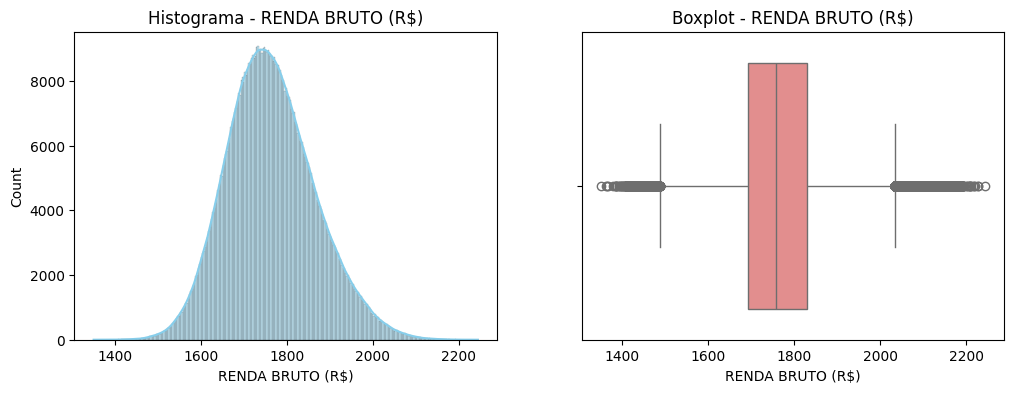

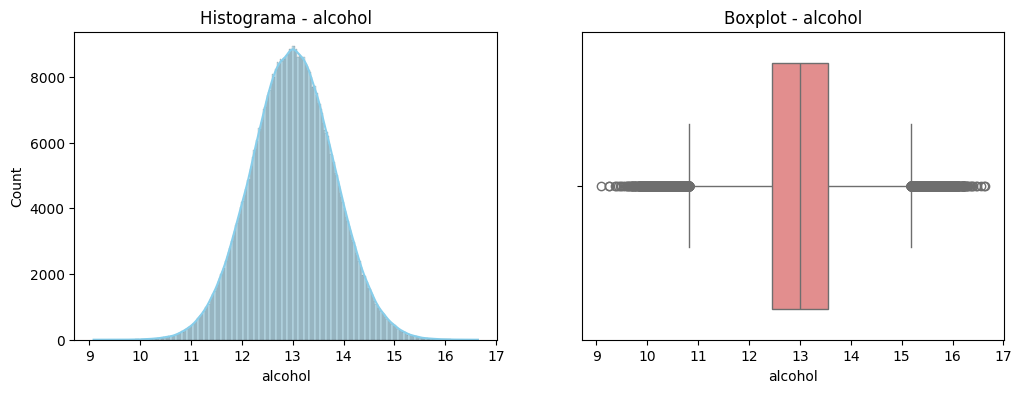

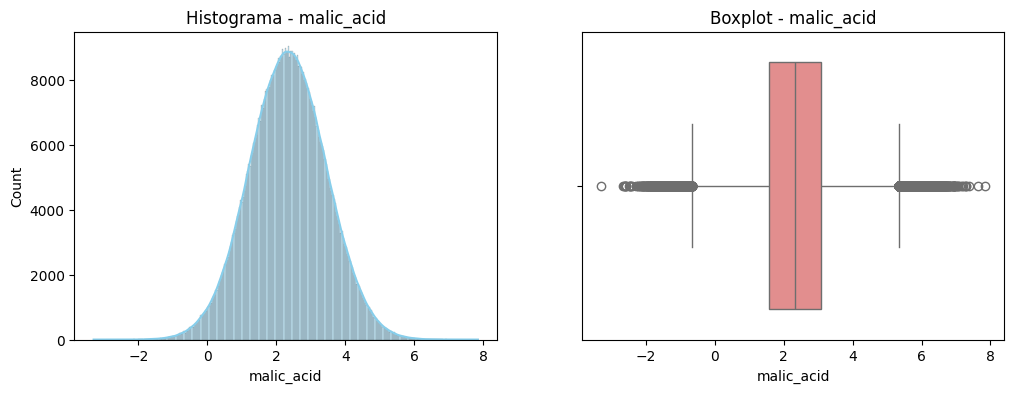

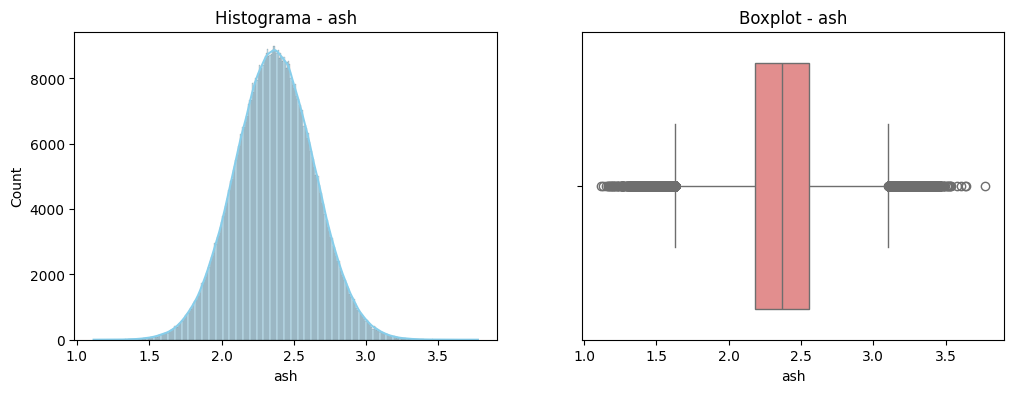

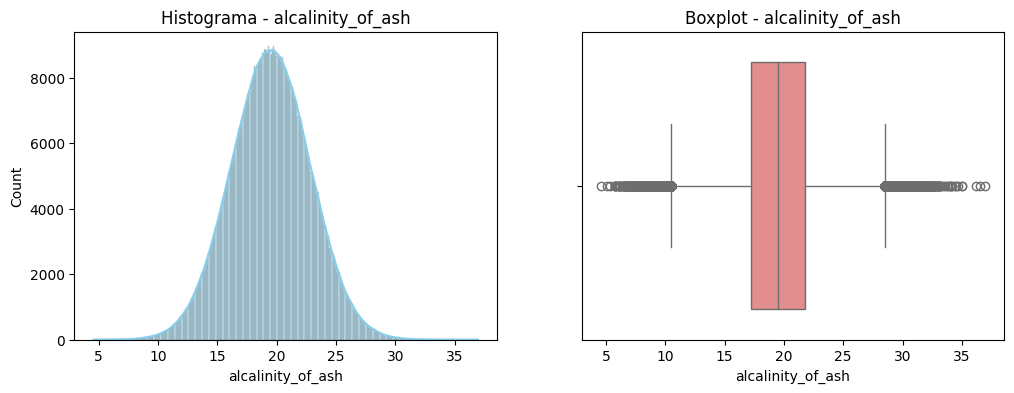

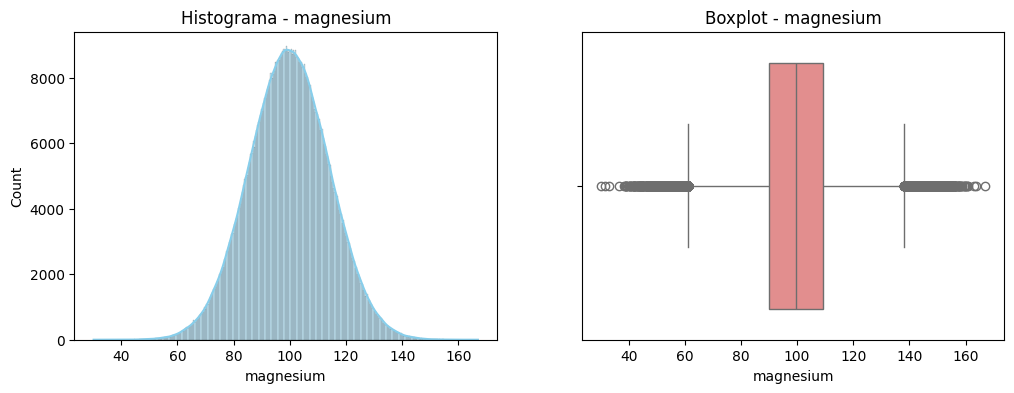

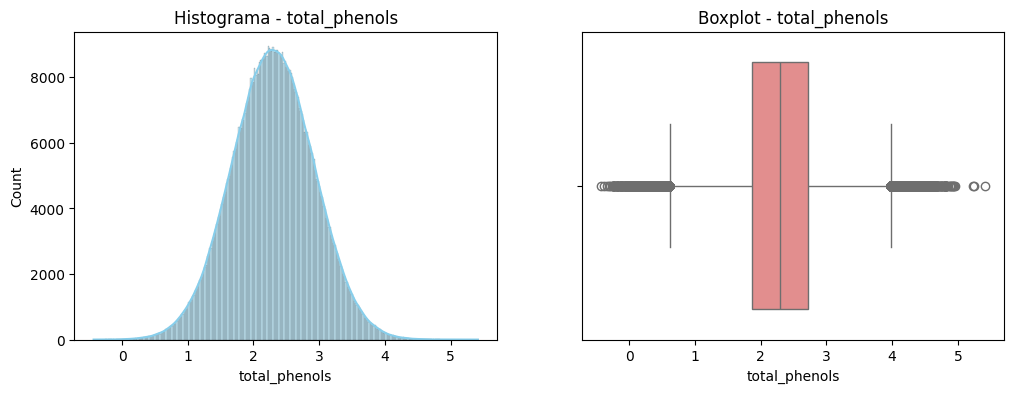

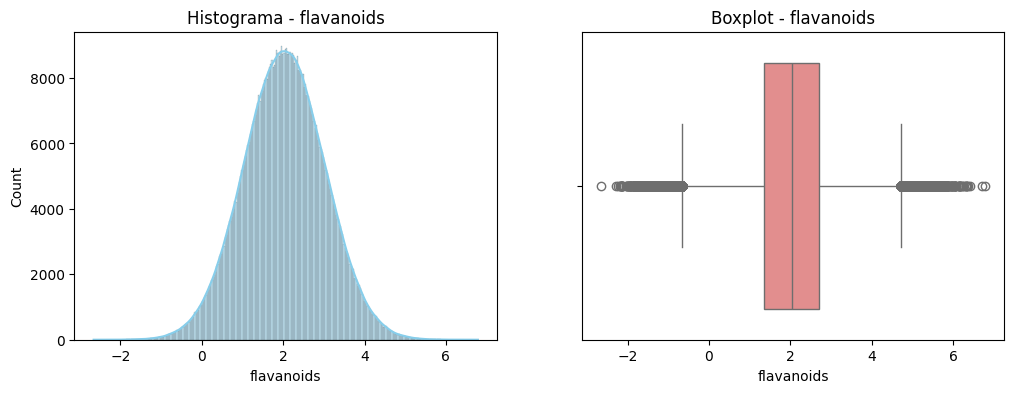

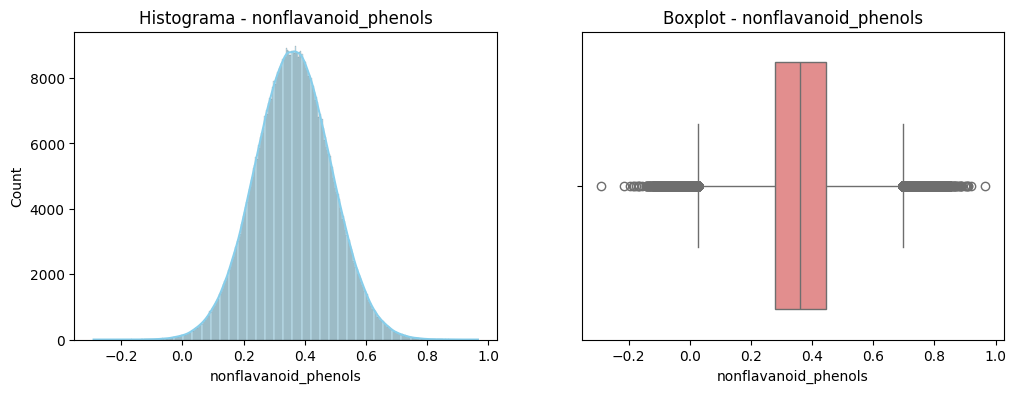

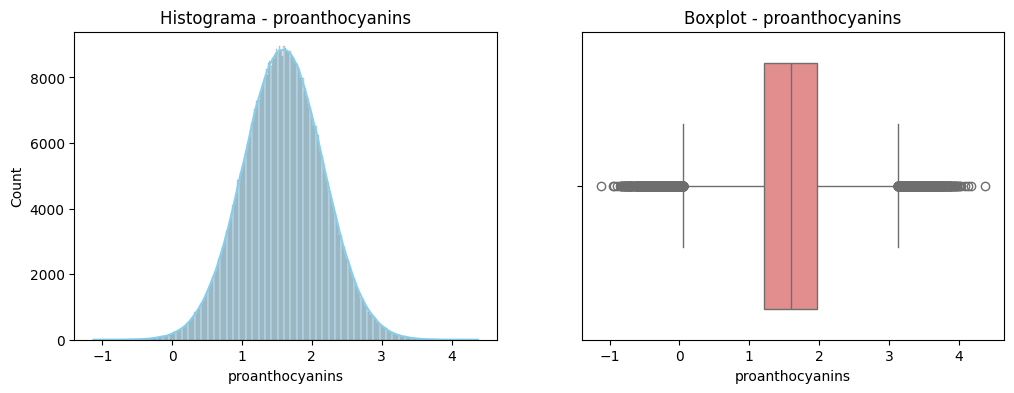

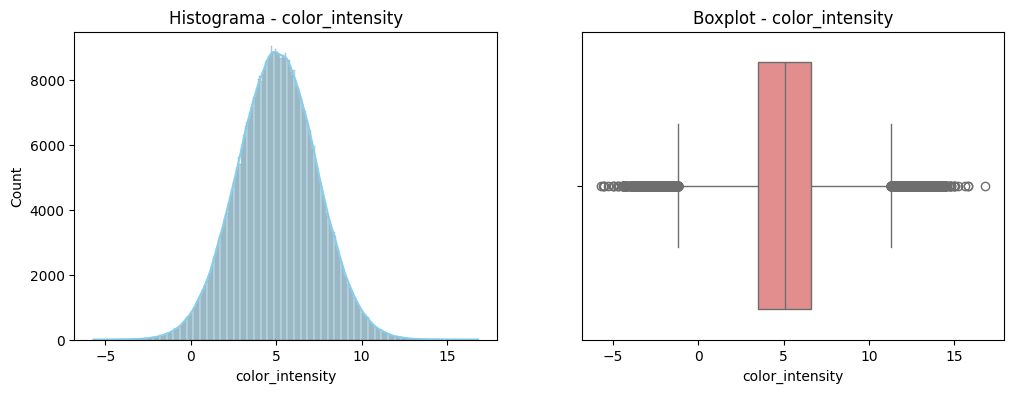

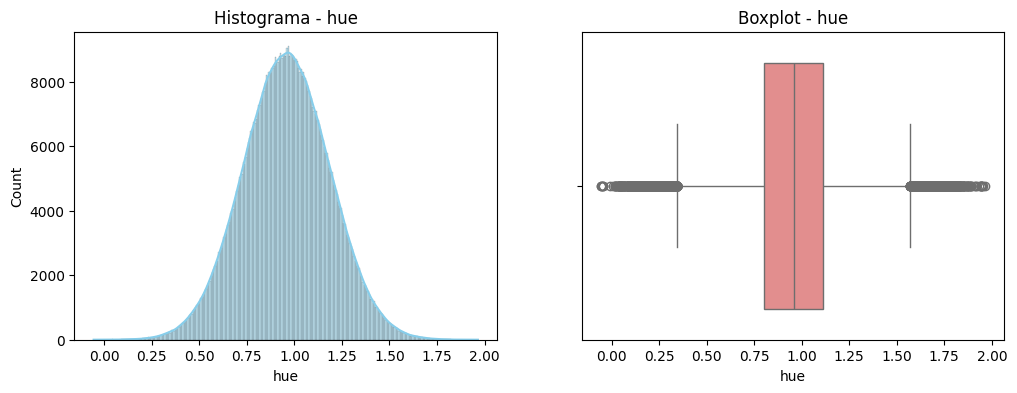

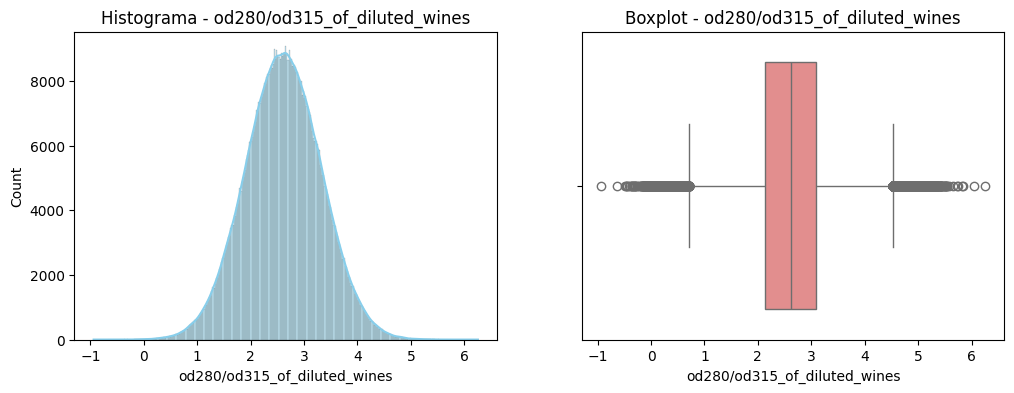

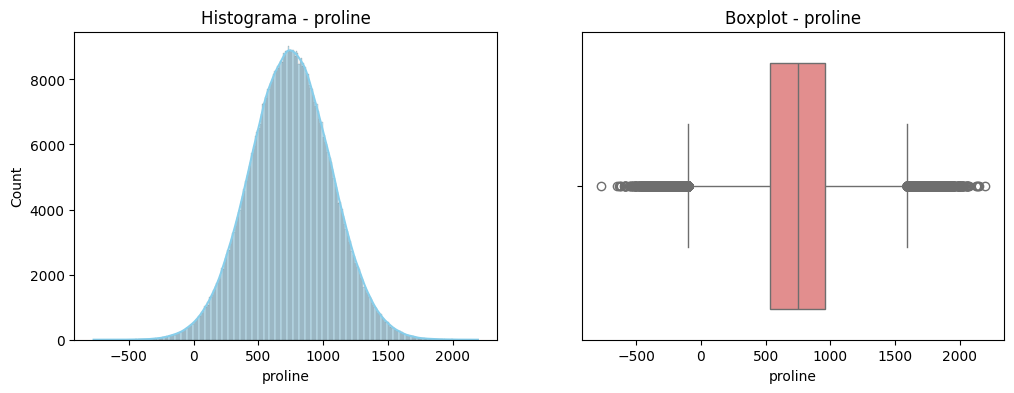

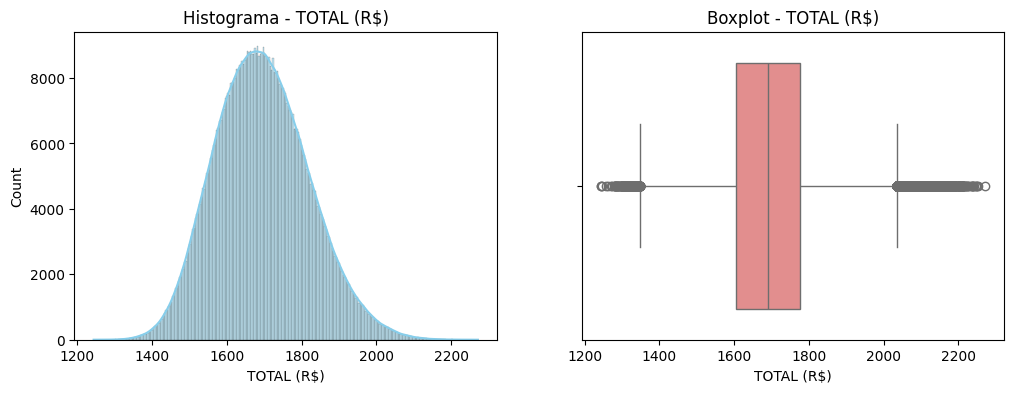

min          25%         mode  \
RENDA BRUTO (R$)              1349.760000  1691.920000  1748.270000   
alcohol                          9.087005    12.454978     9.087005   
malic_acid                      -3.301832     1.584353    -3.301832   
ash                              1.115420     2.182632     1.115420   
alcalinity_of_ash                4.577714    17.253005     4.577714   
magnesium                       30.138381    90.126467    30.138381   
total_phenols                   -0.433028     1.874293    -0.433028   
flavanoids                      -2.654913     1.355908    -2.654913   
nonflavanoid_phenols            -0.290248     0.278157    -0.290248   
proanthocyanins                 -1.124875     1.204679    -1.124875   
color_intensity                 -5.681081     3.497747    -5.681081   
hue                             -0.056430     0.804079    -0.056430   
od280/od315_of_diluted_wines    -0.938678     2.135776    -0.938678   
proline                       -772.601755   535.934029  -772.601755   
TOTAL (R$)                    1243.500000  1605.860000  1694.860000   

                              50% (mediana)         mean          75%  \
RENDA BRUTO (R$)                1756.880000  1763.370059  1828.680000   
alcohol                           13.000658    13.000777    13.547655   
malic_acid                         2.335758     2.336617     3.086886   
ash                                2.366691     2.366812     2.551486   
alcalinity_of_ash                 19.502595    19.498836    21.745716   
magnesium                         99.736404    99.740784   109.367244   
total_phenols                      2.295304     2.295235     2.716401   
flavanoids                         2.028696     2.027943     2.699768   
nonflavanoid_phenols               0.361861     0.361813     0.445343   
proanthocyanins                    1.590521     1.590568     1.976400   
color_intensity                    5.060141     5.059440     6.621081   
hue                                0.957556     0.957526     1.111234   
od280/od315_of_diluted_wines       2.611819     2.612470     3.089685   
proline                          747.451291   747.346542   958.934954   
TOTAL (R$)                      1689.340000  1694.846251  1777.280000   

                                      max         std        range  coef_var  
RENDA BRUTO (R$)              2244.590000  102.824379   894.830000  0.058311  
alcohol                         16.642064    0.810521     7.555060  0.062344  
malic_acid                       7.846186    1.112613    11.148018  0.476164  
ash                              3.773560    0.273756     2.658140  0.115665  
alcalinity_of_ash               36.963926    3.336788    32.386212  0.171128  
magnesium                      166.978168   14.251880   136.839787  0.142889  
total_phenols                    5.415646    0.623929     5.848674  0.271837  
flavanoids                       6.786243    0.996353     9.441155  0.491312  
nonflavanoid_phenols             0.965680    0.124146     1.255928  0.343121  
proanthocyanins                  4.377366    0.571668     5.502241  0.359411  
color_intensity                 16.795867    2.312281    22.476948  0.457023  
hue                              1.965102    0.227787     2.021532  0.237892  
od280/od315_of_diluted_wines     6.255720    0.707776     7.194398  0.270922  
proline                       2195.550672  314.018204  2968.152427  0.420178  
TOTAL (R$)                    2271.480000  124.742780  1027.980000  0.073601



CONTAS VIP


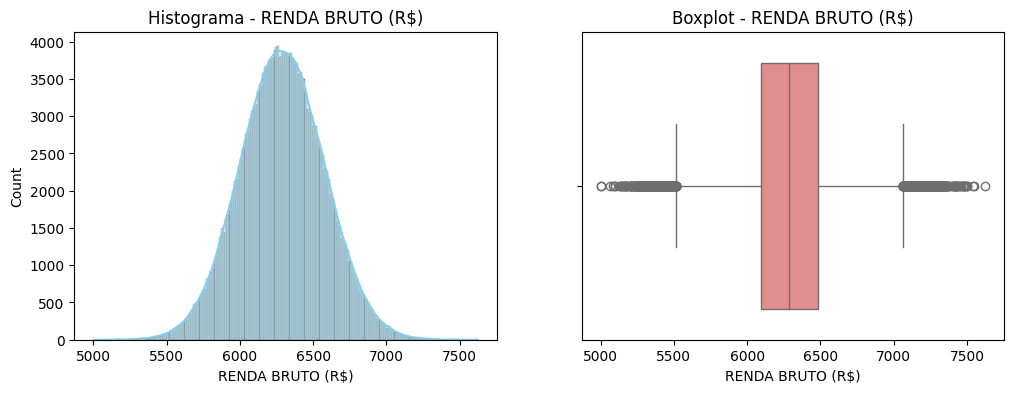

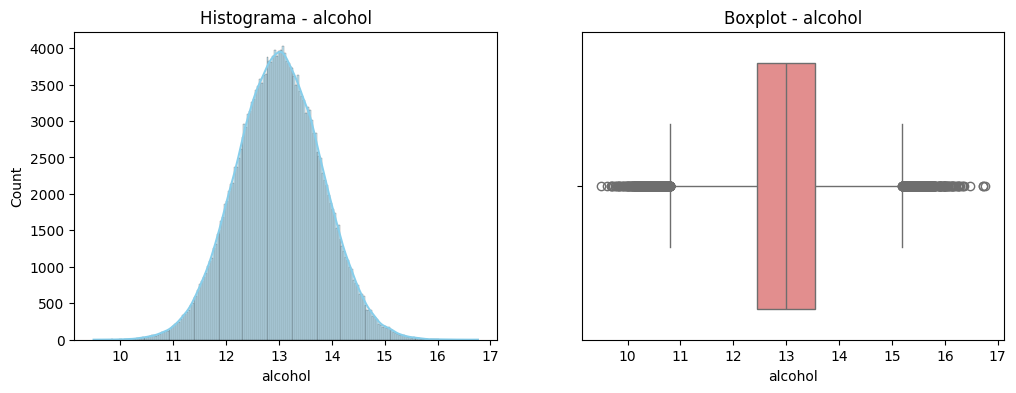

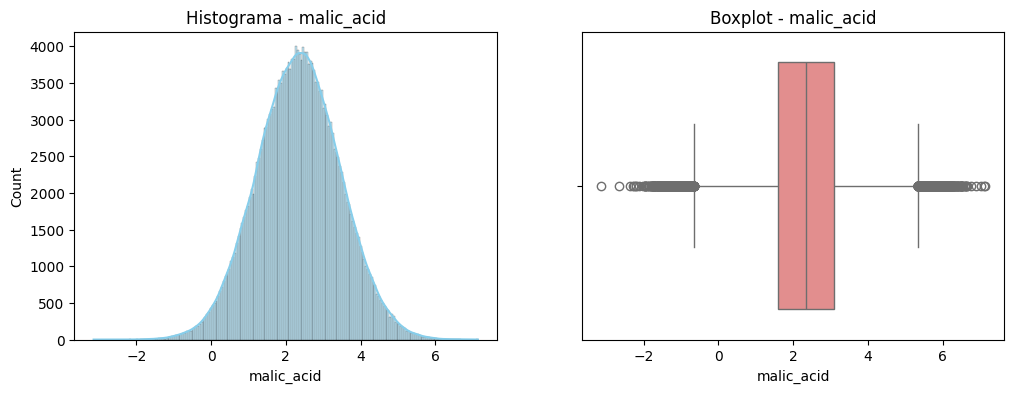

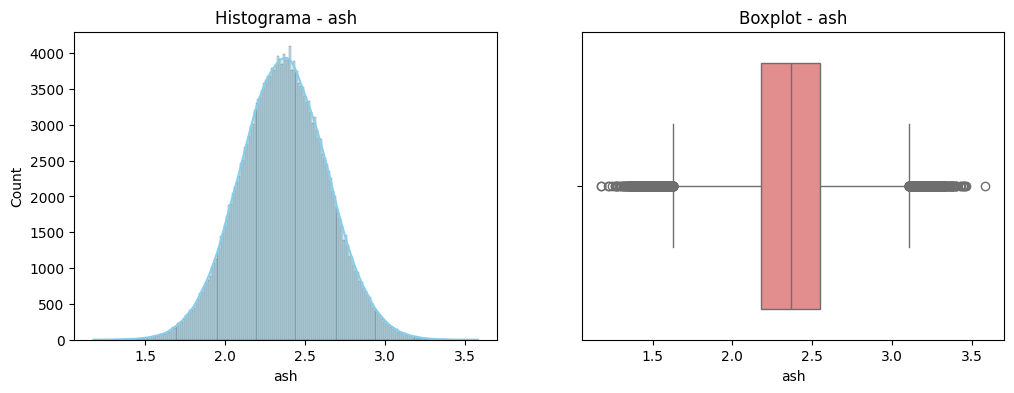

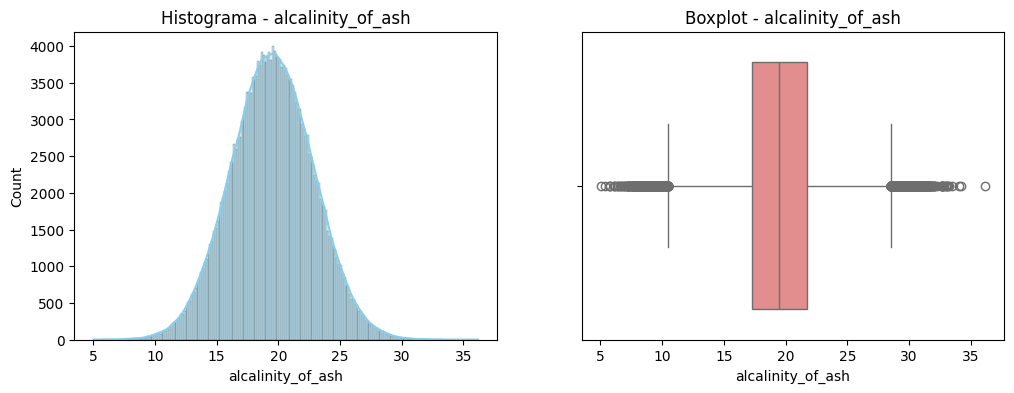

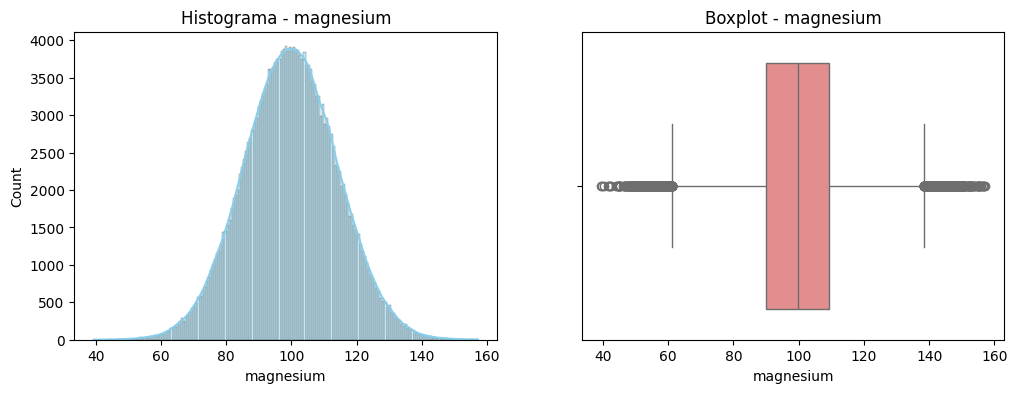

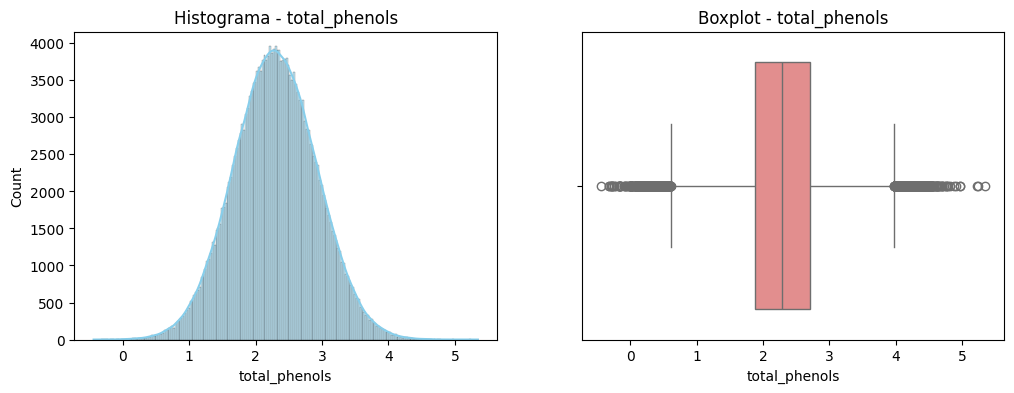

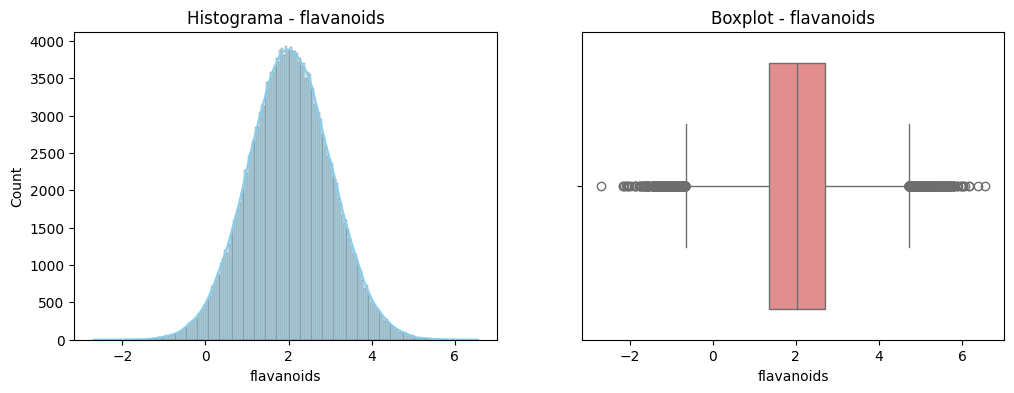

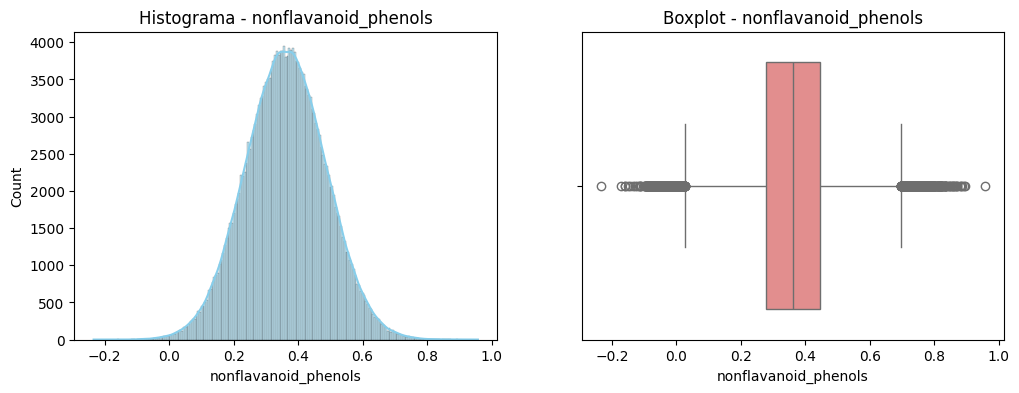

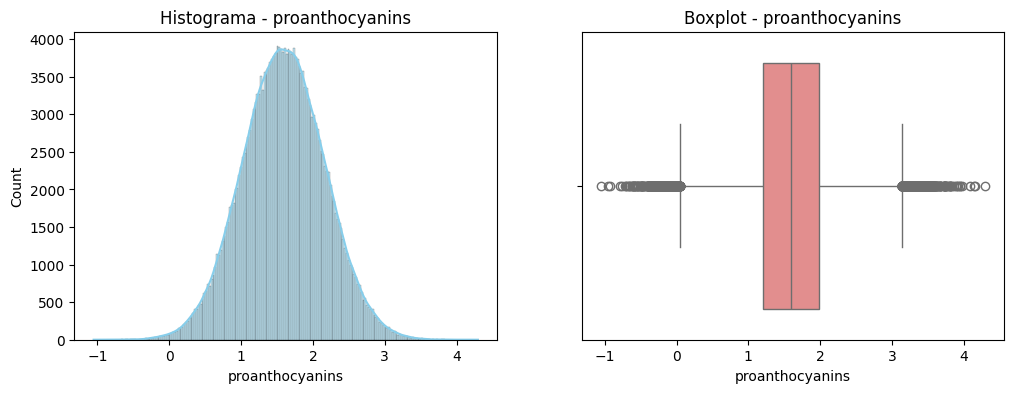

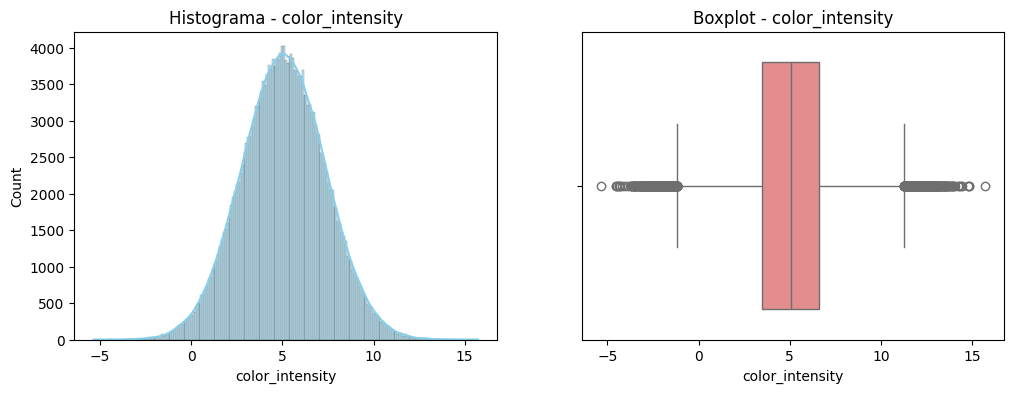

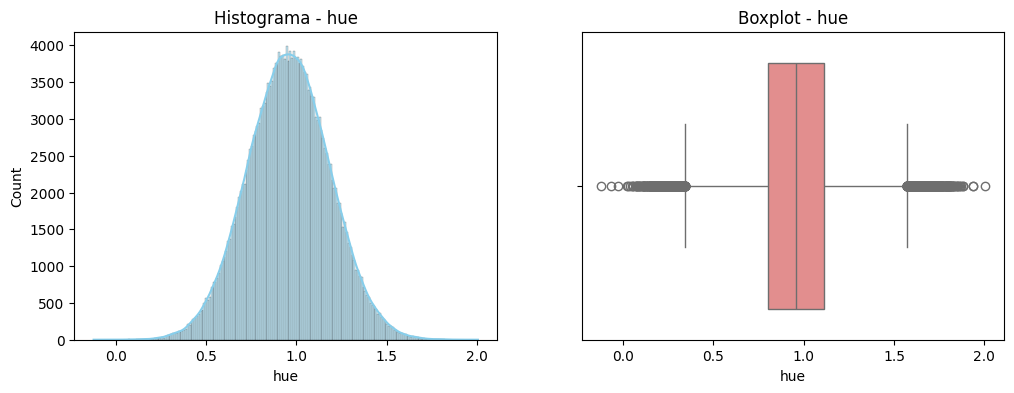

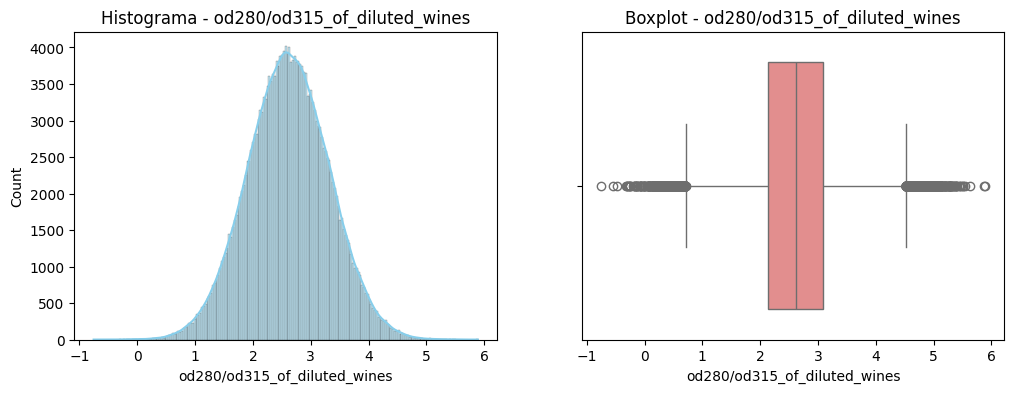

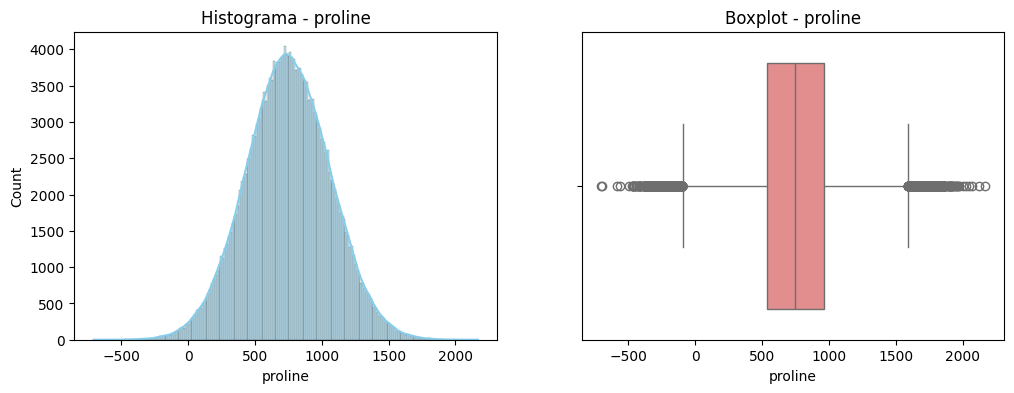

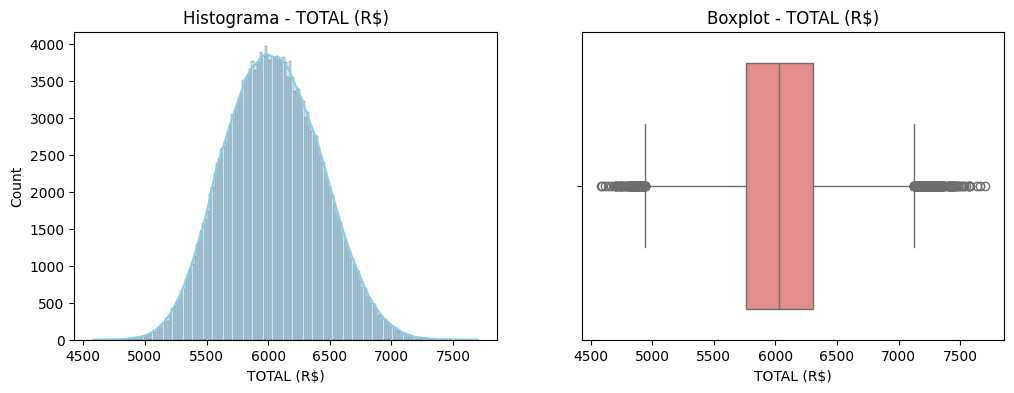

min          25%         mode  \
RENDA BRUTO (R$)              5002.530000  6095.490000  6194.330000   
alcohol                          9.496197    12.451548     9.496197   
malic_acid                      -3.140087     1.589257    -3.140087   
ash                              1.176448     2.182478     1.176448   
alcalinity_of_ash                5.033870    17.251577     5.033870   
magnesium                       39.401777    90.151844    39.401777   
total_phenols                   -0.440669     1.872996    -0.440669   
flavanoids                      -2.690146     1.357685    -2.690146   
nonflavanoid_phenols            -0.234138     0.277577    -0.234138   
proanthocyanins                 -1.053812     1.204832    -1.053812   
color_intensity                 -5.360719     3.506455    -5.360719   
hue                             -0.123197     0.803443    -0.123197   
od280/od315_of_diluted_wines    -0.754779     2.137893    -0.754779   
proline                       -706.109070   537.416901  -706.109070   
TOTAL (R$)                    4583.860000  5763.620000  6012.060000   

                              50% (mediana)         mean          75%  \
RENDA BRUTO (R$)                6288.640000  6289.743683  6483.010000   
alcohol                           13.000415    12.999816    13.550273   
malic_acid                         2.342539     2.340537     3.087206   
ash                                2.366590     2.366546     2.551490   
alcalinity_of_ash                 19.495739    19.495722    21.750426   
magnesium                         99.772748    99.785795   109.444810   
total_phenols                      2.292897     2.294876     2.715840   
flavanoids                         2.027453     2.029890     2.699291   
nonflavanoid_phenols               0.361597     0.361625     0.445567   
proanthocyanins                    1.590789     1.591514     1.976972   
color_intensity                    5.061339     5.062045     6.620243   
hue                                0.957318     0.957364     1.110607   
od280/od315_of_diluted_wines       2.613379     2.614339     3.090302   
proline                          746.761353   747.884329   959.610398   
TOTAL (R$)                      6031.845000  6039.954800  6309.132500   

                                      max         std        range  coef_var  
RENDA BRUTO (R$)              7624.340000  287.165282  2621.810000  0.045656  
alcohol                         16.762974    0.810461     7.266777  0.062344  
malic_acid                       7.134795    1.111215    10.274882  0.474769  
ash                              3.583718    0.272967     2.407271  0.115344  
alcalinity_of_ash               36.170106    3.332793    31.136236  0.170950  
magnesium                      157.170770   14.273178   117.768992  0.143038  
total_phenols                    5.347375    0.625322     5.788045  0.272486  
flavanoids                       6.555086    0.996001     9.245233  0.490667  
nonflavanoid_phenols             0.957806    0.124479     1.191944  0.344221  
proanthocyanins                  4.297961    0.570752     5.351773  0.358622  
color_intensity                 15.726513    2.303562    21.087231  0.455065  
hue                              2.005302    0.227774     2.128499  0.237917  
od280/od315_of_diluted_wines     5.891900    0.706986     6.646679  0.270426  
proline                       2168.076337  313.871527  2874.185407  0.419679  
TOTAL (R$)                    7702.570000  386.656261  3118.710000  0.064016



CONTAS PRIME


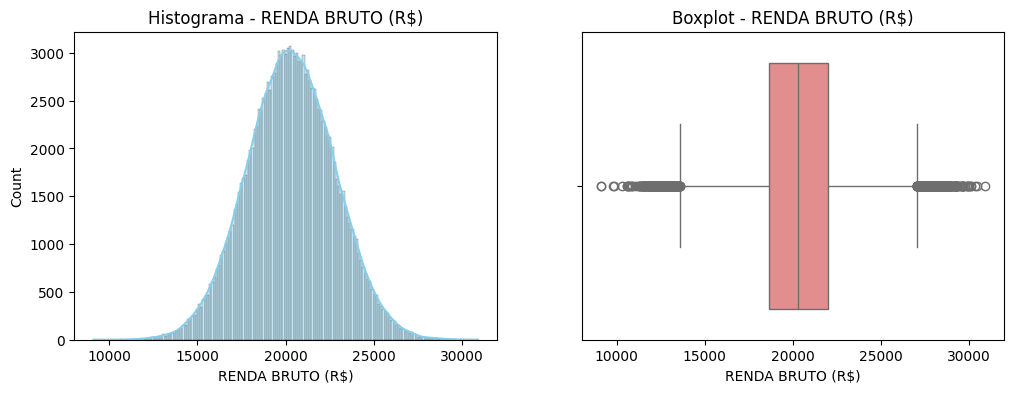

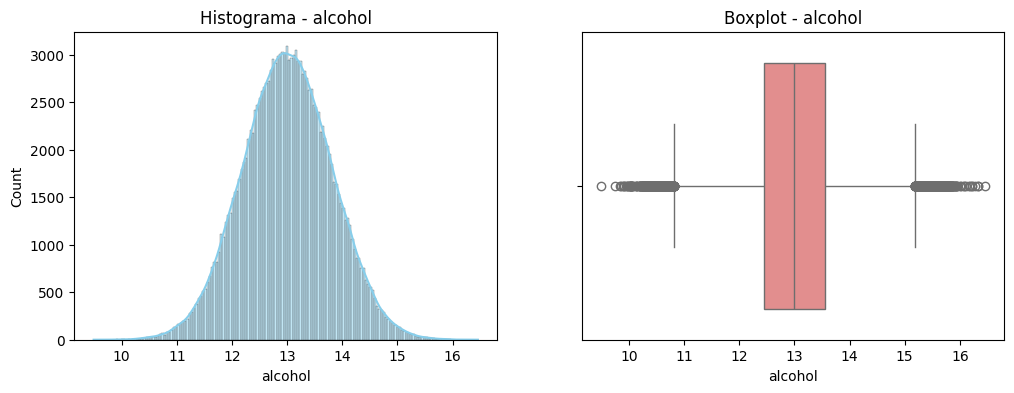

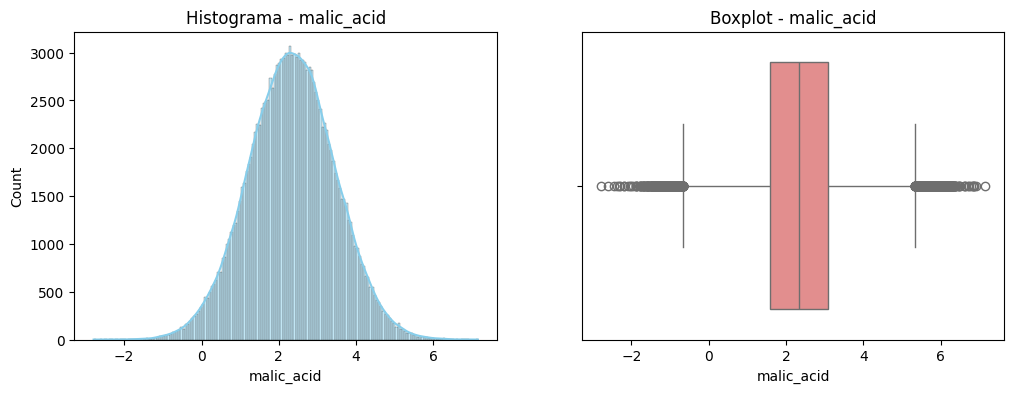

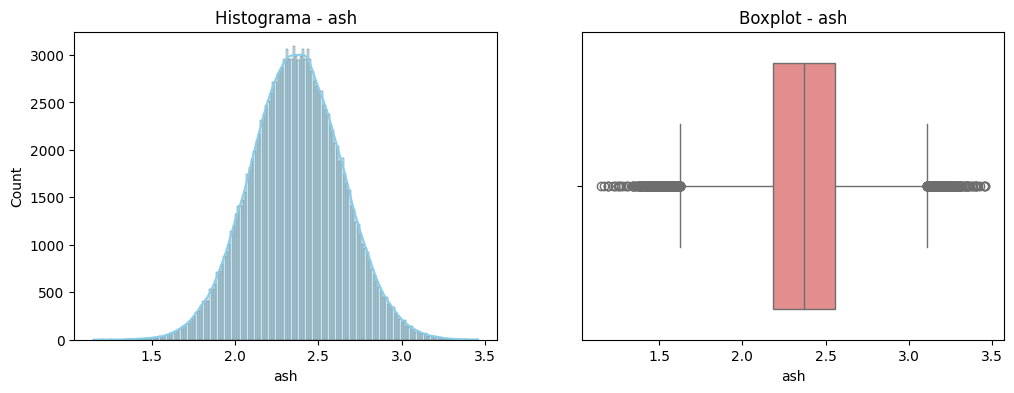

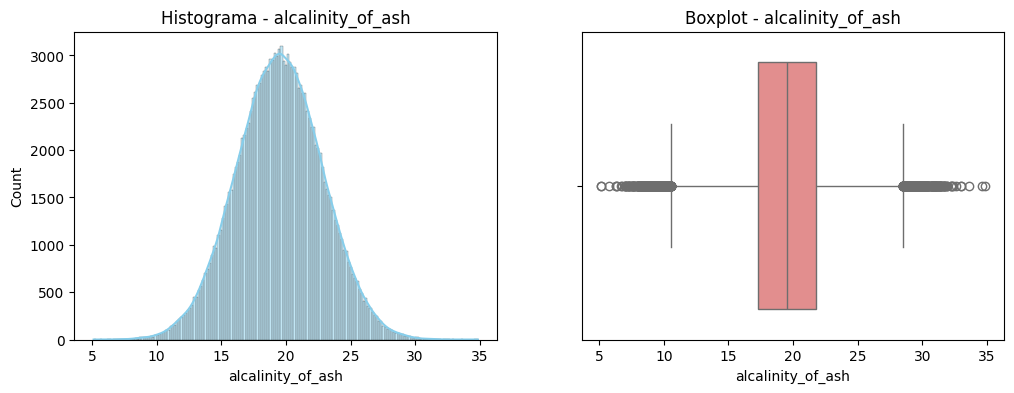

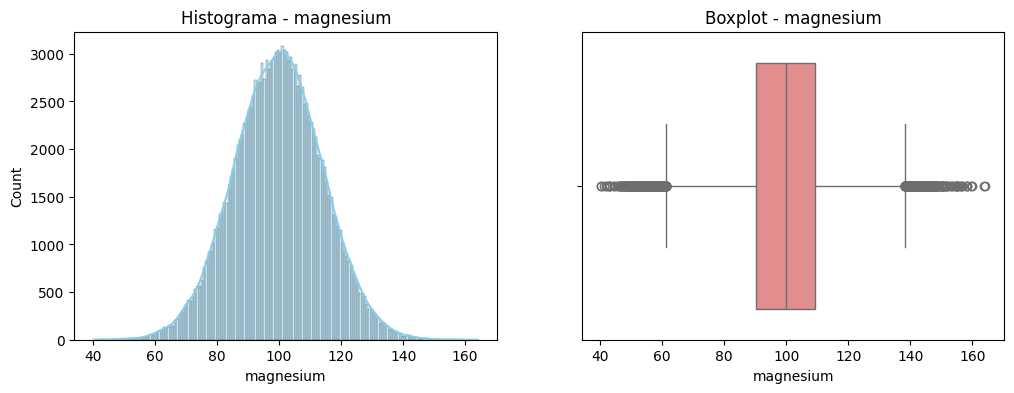

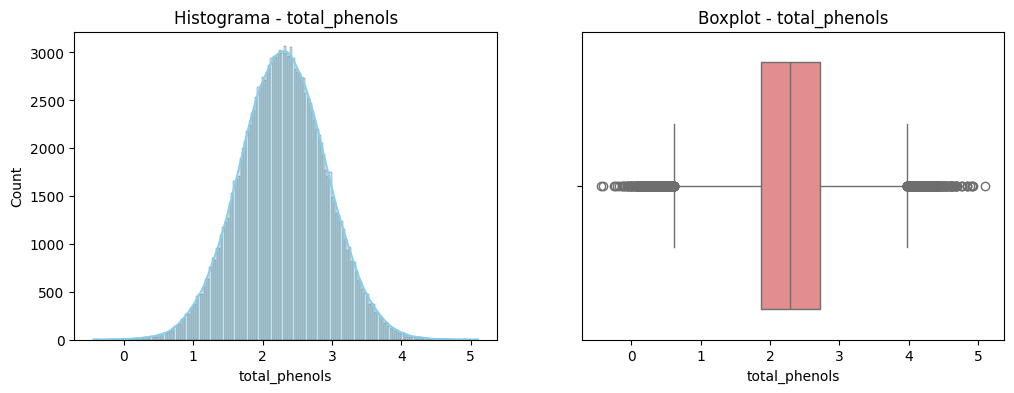

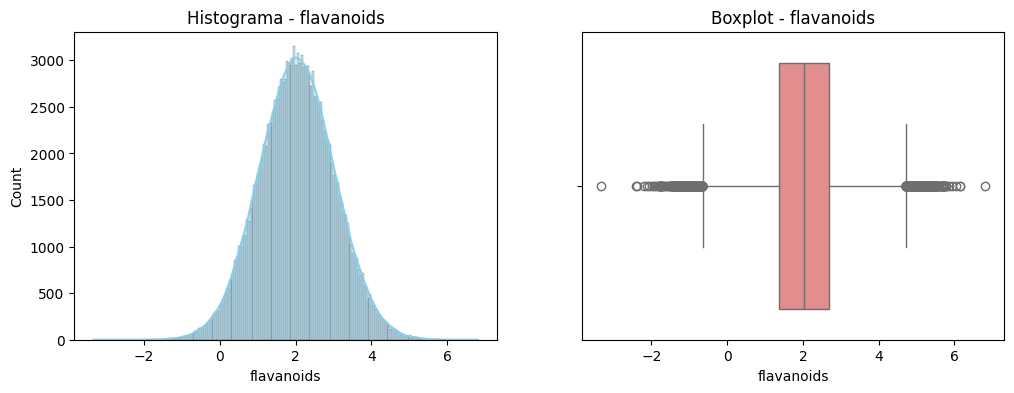

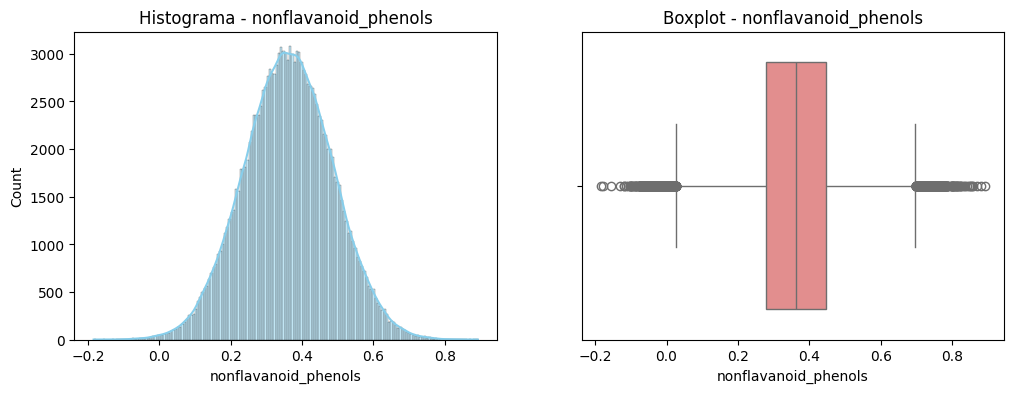

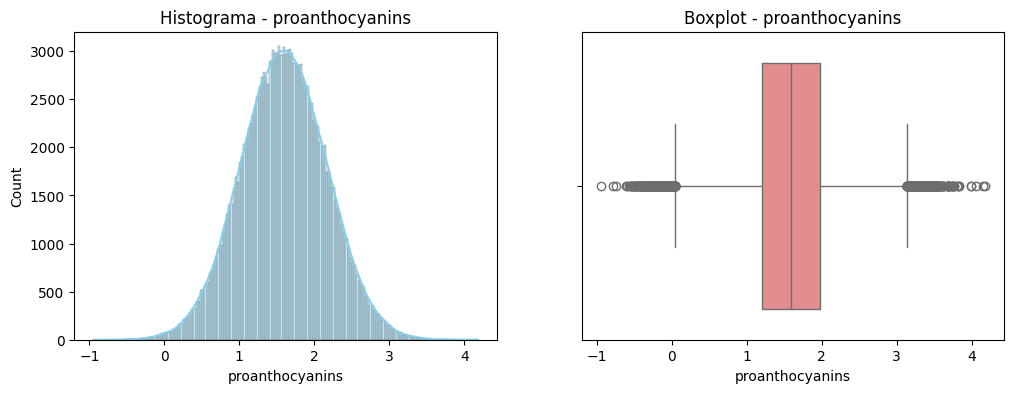

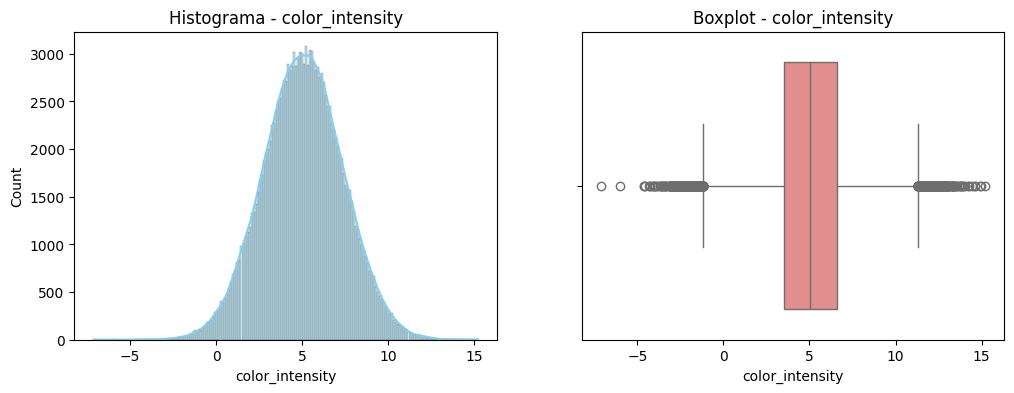

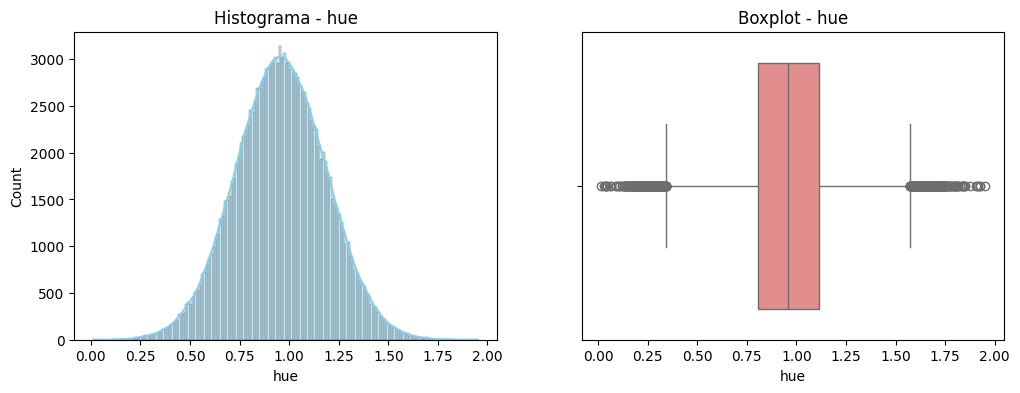

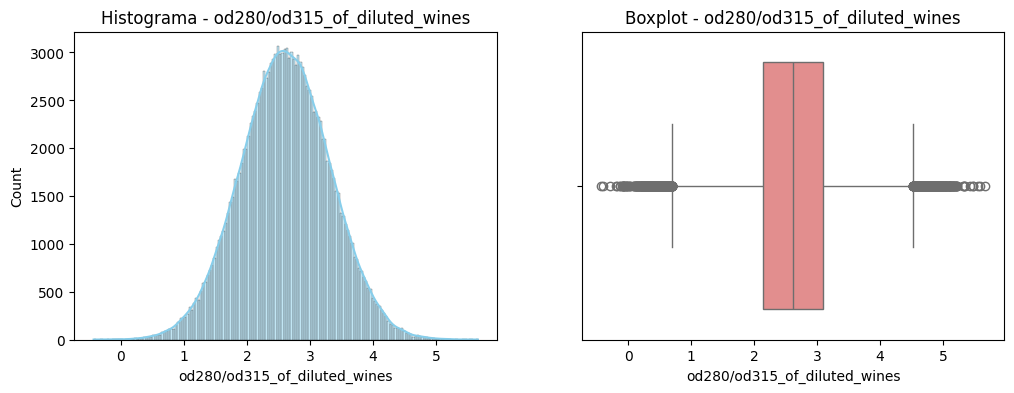

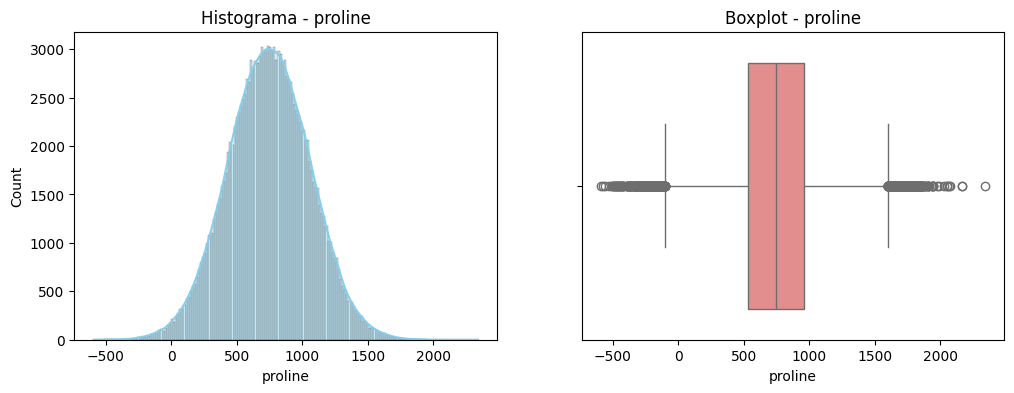

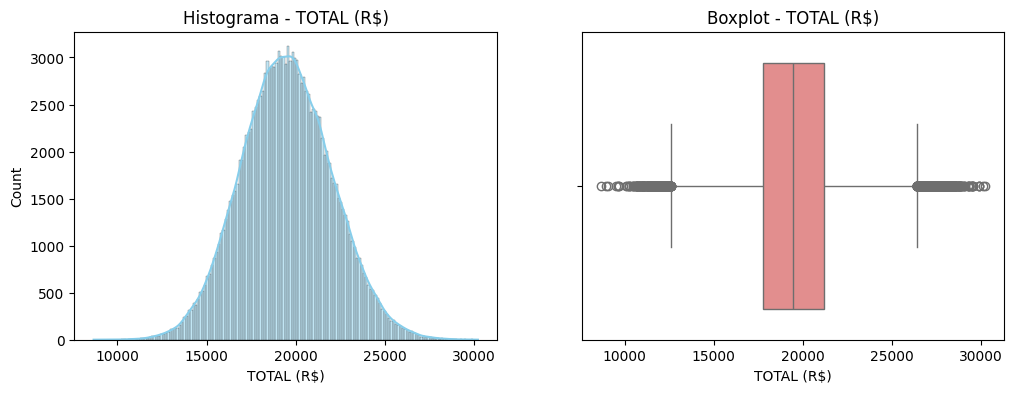

min           25%          mode  \
RENDA BRUTO (R$)              9109.150000  18625.227500  19452.490000   
alcohol                          9.491342     12.456516      9.491342   
malic_acid                      -2.791511      1.583789     -2.791511   
ash                              1.150600      2.182884      1.150600   
alcalinity_of_ash                5.131915     17.265249      5.131915   
magnesium                       40.237320     90.105671     40.237320   
total_phenols                   -0.436336      1.874848     -0.436336   
flavanoids                      -3.335472      1.357189     -3.335472   
nonflavanoid_phenols            -0.183797      0.277970     -0.183797   
proanthocyanins                 -0.943546      1.205239     -0.943546   
color_intensity                 -7.115501      3.493126     -7.115501   
hue                              0.013845      0.803686      0.013845   
od280/od315_of_diluted_wines    -0.434597      2.133665     -0.434597   
proline                       -591.420474    534.258725   -591.420474   
TOTAL (R$)                    8661.060000  17755.622500  19078.820000   

                              50% (mediana)          mean           75%  \
RENDA BRUTO (R$)               20297.355000  20305.212898  21992.622500   
alcohol                           13.000358     13.002579     13.548545   
malic_acid                         2.337123      2.336494      3.084362   
ash                                2.367402      2.367690      2.552913   
alcalinity_of_ash                 19.511490     19.506765     21.749384   
magnesium                         99.807489     99.733347    109.337341   
total_phenols                      2.294704      2.295259      2.715098   
flavanoids                         2.029624      2.029841      2.697261   
nonflavanoid_phenols               0.361814      0.361751      0.445638   
proanthocyanins                    1.591227      1.591329      1.977124   
color_intensity                    5.053353      5.051659      6.607798   
hue                                0.957701      0.957826      1.111846   
od280/od315_of_diluted_wines       2.610902      2.611391      3.090800   
proline                          746.959177    746.686730    959.693911   
TOTAL (R$)                     19457.480000  19497.628812  21205.392500   

                                       max          std         range  \
RENDA BRUTO (R$)              30912.290000  2487.948758  21803.140000   
alcohol                          16.459082     0.806190      6.967739   
malic_acid                        7.151682     1.115649      9.943193   
ash                               3.457455     0.273644      2.306855   
alcalinity_of_ash                34.853497     3.329528     29.721582   
magnesium                       164.103639    14.259441    123.866319   
total_phenols                     5.102777     0.624108      5.539113   
flavanoids                        6.810544     0.995221     10.146016   
nonflavanoid_phenols              0.892582     0.124056      1.076379   
proanthocyanins                   4.181389     0.570934      5.124935   
color_intensity                  15.205711     2.315598     22.321212   
hue                               1.951845     0.228207      1.938000   
od280/od315_of_diluted_wines      5.668435     0.709251      6.103031   
proline                        2342.569670   313.753599   2933.990143   
TOTAL (R$)                    30230.950000  2548.757117  21569.890000   

                              coef_var  
RENDA BRUTO (R$)              0.122528  
alcohol                       0.062002  
malic_acid                    0.477489  
ash                           0.115574  
alcalinity_of_ash             0.170686  
magnesium                     0.142976  
total_phenols                 0.271912  
flavanoids                    0.490295  
nonflavanoid_phenols          0.342933  
proanthocyanins               0.358778  
color_intensity               0.458384  
hue    

In [39]:
AtividadeA2_1()

In [40]:
help(AtividadeA2_1)

Help on function AtividadeA2_1 in module __main__:

AtividadeA2_1()
    HELP: Solução da etapa A2.1
    Analisa variáveis quantitativas gerando:
      - min
      - std
      - 25%
      - mode
      - 50%
      - mean
      - 75%
      - range
      - max
      - coeficiente de variação
      - histograma
      - boxplot



### Atividade A2.2: Analisar as variáveis Qualitativas

In [41]:
def pareto(table, column, title):
    """
    Gera o Diagrama de Pareto e exibe a tabela de frequências:
      - Frequência Absoluta
      - Frequência Relativa (%)
      - Frequência Acumulada (%)
    """
    from matplotlib.ticker import PercentFormatter
    # Contagem
    se = table[column].value_counts()
    df = pd.DataFrame({
        "Categoria": se.index,
        "Frequência Absoluta": se.values
    })
    df["Frequência Relativa (%)"] = round(df["Frequência Absoluta"] / df["Frequência Absoluta"].sum() * 100, 2)
    df["Frequência Acumulada (%)"] = round(df["Frequência Absoluta"].cumsum() / df["Frequência Absoluta"].sum() * 100, 2)

    # Ordenar por frequência
    df = df.sort_values(by="Frequência Absoluta", ascending=False).reset_index(drop=True)

    # Gráfico de Pareto
    fig, ax = plt.subplots(figsize=(8,5))
    ax2 = ax.twinx()

    ax.bar(df["Categoria"], df["Frequência Absoluta"], color="C0")
    ax2.plot(df["Categoria"], df["Frequência Acumulada (%)"], color="C1", marker="D", ms=7)

    ax2.yaxis.set_major_formatter(PercentFormatter())
    ax.tick_params(axis="y", colors="C0")
    ax2.tick_params(axis="y", colors="C1")

    if column == 'OPINIÃO DO CLIENTE':
        ax.set_xticks(range(len(df["Categoria"]))) 
        ax.set_xticklabels(df["Categoria"], rotation=90, ha='right')
    
    plt.title(f"DIAGRAMA DE PARETO - {column.replace('NOME','')} - {title}")
    plt.show()

    # Exibir tabelinha
    print(f"\n📊 Tabela de Frequências - {column.replace('NOME','')}")
    display(df)
    
    #return df


def AtividadeA2_2():
    """
    HELP: Solução da etapa A2.2
    Analisa variáveis qualitativas gerando:
      - Frequência absoluta e relativa
      - Gráfico de Pareto
      - Boxplot (relacionando qualitativas com TOTAL (R$))
    """
    colunas_qualitativas = [
        'NOME REGIÃO',
        'NOME SEXO',
        #'NOME TIPO DA CONTA',
        'NOME ESTADO CIVIL',
        'NOTA OPINIÃO',
    ]

    print("CONTAS ESSENTIAL")
    for col in colunas_qualitativas:

        pareto(df_essential,col,'Contas ESSENTIAL')
        plt.figure(figsize=(8,5))
        sns.boxplot(x=col, y='TOTAL (R$)', data=df_essential, hue=col, palette="pastel")
        plt.title(f"Boxplot de TOTAL (R$) por {col.replace('NOME','')} - Contas ESSENTIAL")
        if col == 'OPINIÃO DO CLIENTE':
            plt.xticks(rotation=90)
        plt.show()

    print("\n\nCONTAS VIP")
    for col in colunas_qualitativas:

        pareto(df_vip,col,'Contas VIP')
        plt.figure(figsize=(8,5))
        sns.boxplot(x=col, y='TOTAL (R$)', data=df_essential, hue=col, palette="pastel")
        plt.title(f"Boxplot de TOTAL (R$) por {col.replace('NOME','')} - Contas VIP")
        if col == 'OPINIÃO DO CLIENTE':
            plt.xticks(rotation=90)
        plt.show()

    print("\n\nCONTAS PRIME")
    for col in colunas_qualitativas:

        pareto(df_prime,col,'Contas PRIME')
        plt.figure(figsize=(8,5))
        sns.boxplot(x=col, y='TOTAL (R$)', data=df_prime, hue=col, palette="pastel")
        plt.title(f"Boxplot de TOTAL (R$) por {col.replace('NOME','')} - Contas PRIME")
        if col == 'OPINIÃO DO CLIENTE':
            plt.xticks(rotation=90)
        plt.show()



CONTAS ESSENTIAL


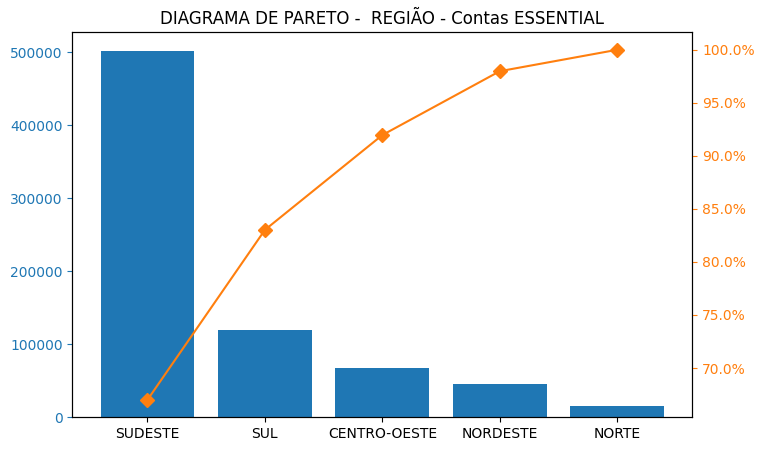


📊 Tabela de Frequências -  REGIÃO


Categoria  Frequência Absoluta  Frequência Relativa (%)  \
0       SUDESTE               502527                    67.00   
1           SUL               120116                    16.02   
2  CENTRO-OESTE                67041                     8.94   
3      NORDESTE                45160                     6.02   
4         NORTE                15156                     2.02   

   Frequência Acumulada (%)  
0                     67.00  
1                     83.02  
2                     91.96  
3                     97.98  
4                    100.00

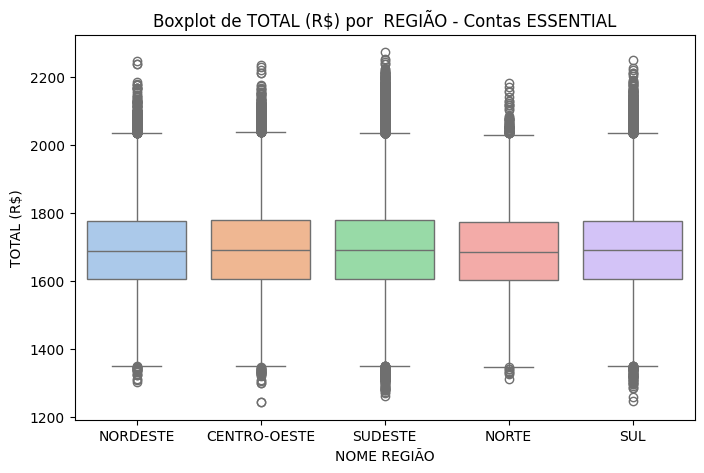

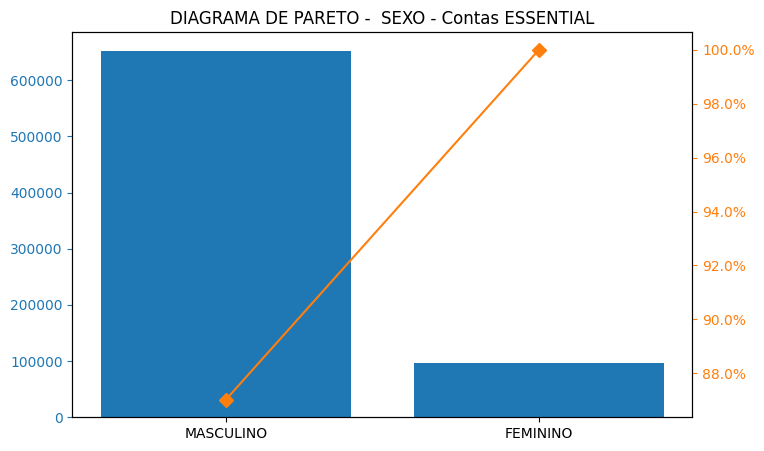


📊 Tabela de Frequências -  SEXO


Categoria  Frequência Absoluta  Frequência Relativa (%)  \
0  MASCULINO               652618                    87.02   
1   FEMININO                97382                    12.98   

   Frequência Acumulada (%)  
0                     87.02  
1                    100.00

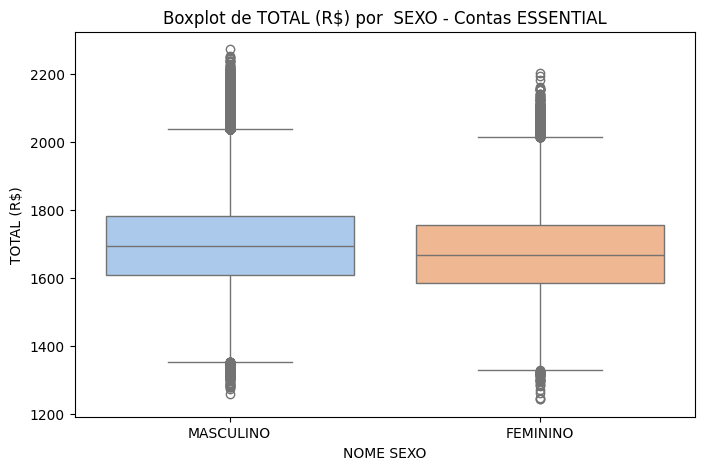

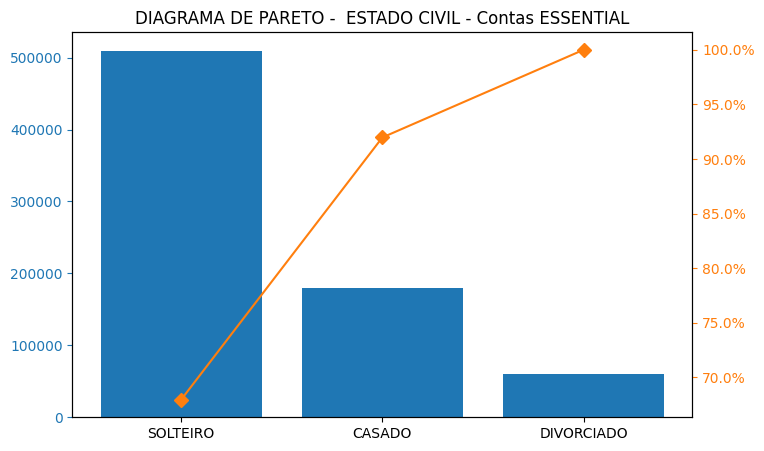


📊 Tabela de Frequências -  ESTADO CIVIL


Categoria  Frequência Absoluta  Frequência Relativa (%)  \
0    SOLTEIRO               509659                    67.95   
1      CASADO               180139                    24.02   
2  DIVORCIADO                60202                     8.03   

   Frequência Acumulada (%)  
0                     67.95  
1                     91.97  
2                    100.00

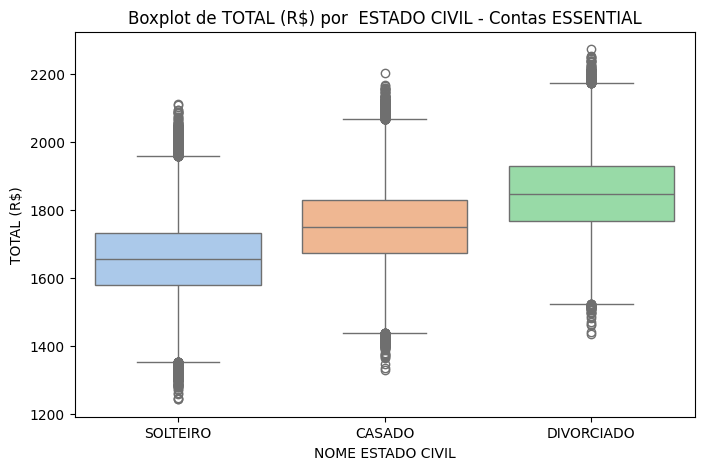

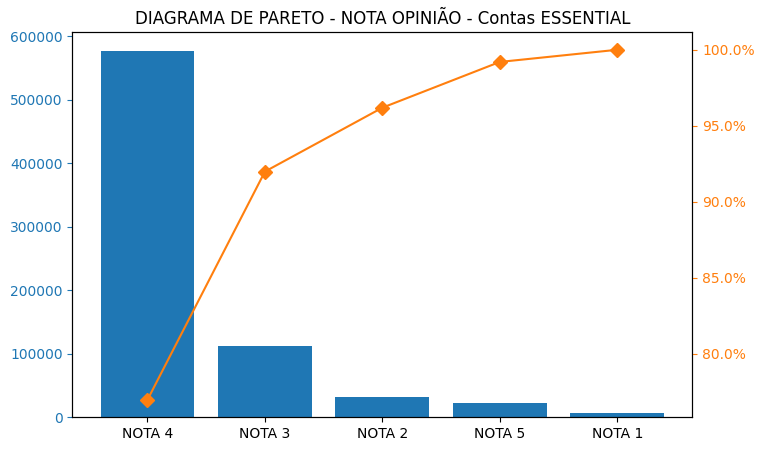


📊 Tabela de Frequências - NOTA OPINIÃO


Categoria  Frequência Absoluta  Frequência Relativa (%)  \
0    NOTA 4               577383                    76.98   
1    NOTA 3               112568                    15.01   
2    NOTA 2                31508                     4.20   
3    NOTA 5                22547                     3.01   
4    NOTA 1                 5994                     0.80   

   Frequência Acumulada (%)  
0                     76.98  
1                     91.99  
2                     96.19  
3                     99.20  
4                    100.00

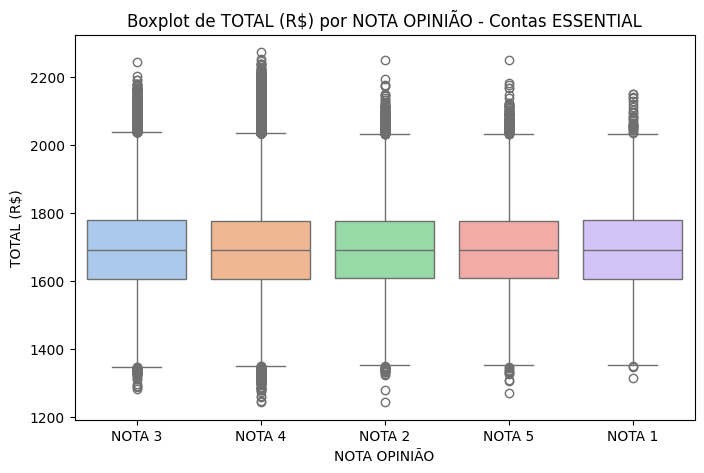



CONTAS VIP


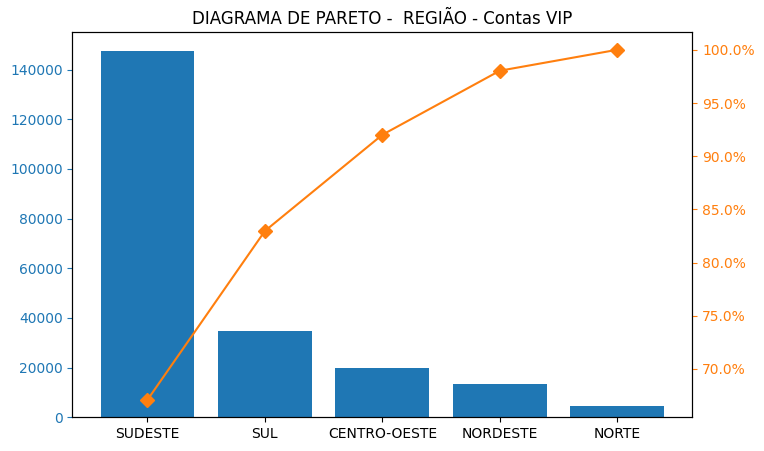


📊 Tabela de Frequências -  REGIÃO


Categoria  Frequência Absoluta  Frequência Relativa (%)  \
0       SUDESTE               147613                    67.10   
1           SUL                34919                    15.87   
2  CENTRO-OESTE                19891                     9.04   
3      NORDESTE                13233                     6.02   
4         NORTE                 4344                     1.97   

   Frequência Acumulada (%)  
0                     67.10  
1                     82.97  
2                     92.01  
3                     98.03  
4                    100.00

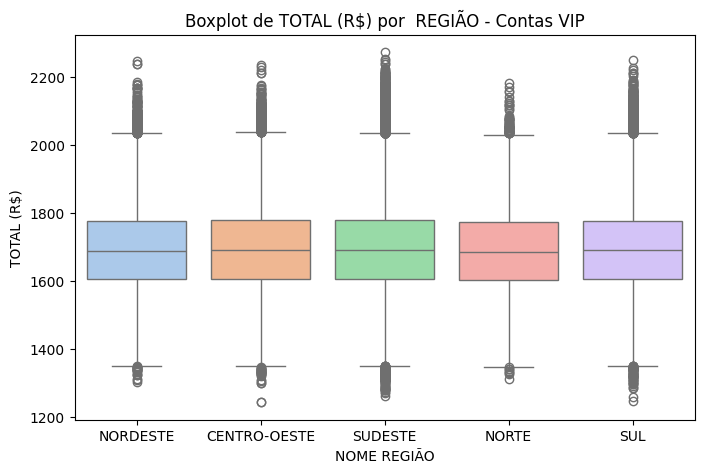

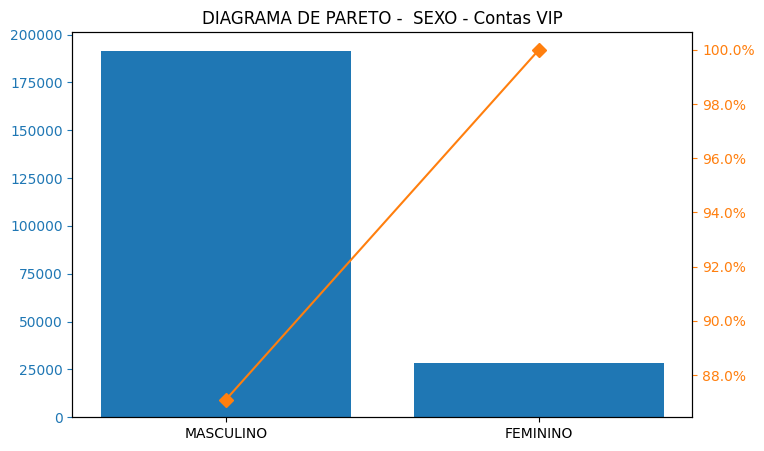


📊 Tabela de Frequências -  SEXO


Categoria  Frequência Absoluta  Frequência Relativa (%)  \
0  MASCULINO               191594                    87.09   
1   FEMININO                28406                    12.91   

   Frequência Acumulada (%)  
0                     87.09  
1                    100.00

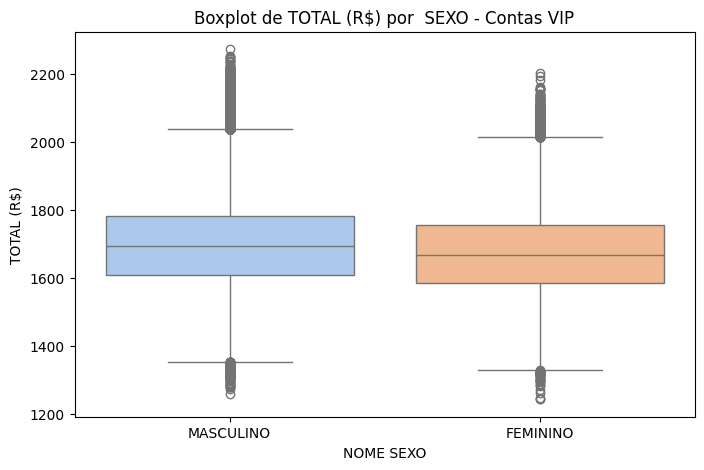

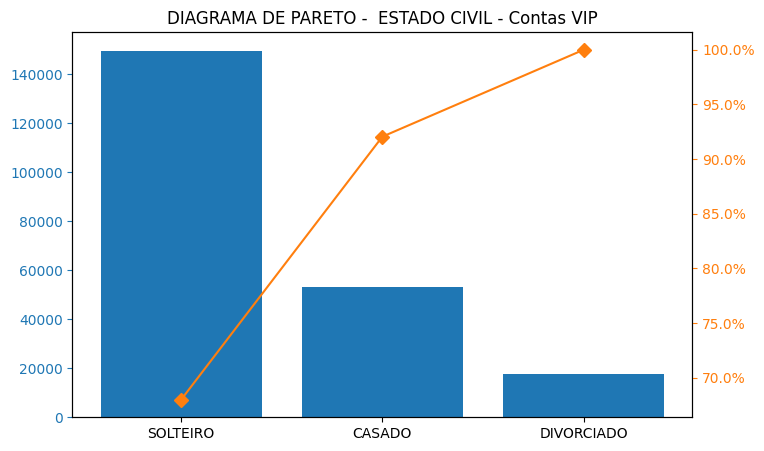


📊 Tabela de Frequências -  ESTADO CIVIL


Categoria  Frequência Absoluta  Frequência Relativa (%)  \
0    SOLTEIRO               149560                    67.98   
1      CASADO                52942                    24.06   
2  DIVORCIADO                17498                     7.95   

   Frequência Acumulada (%)  
0                     67.98  
1                     92.05  
2                    100.00

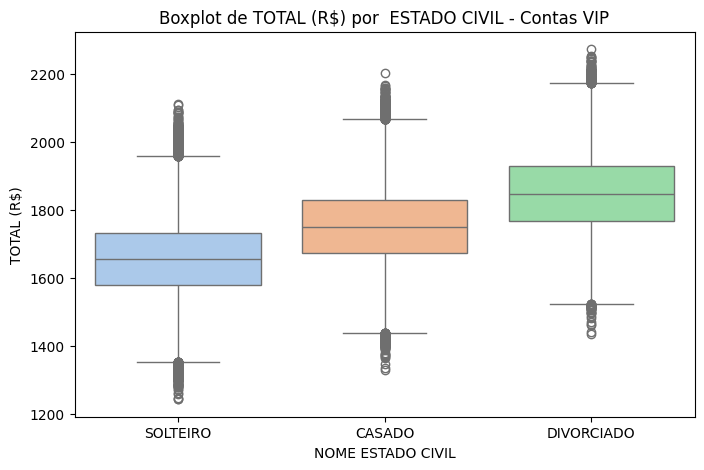

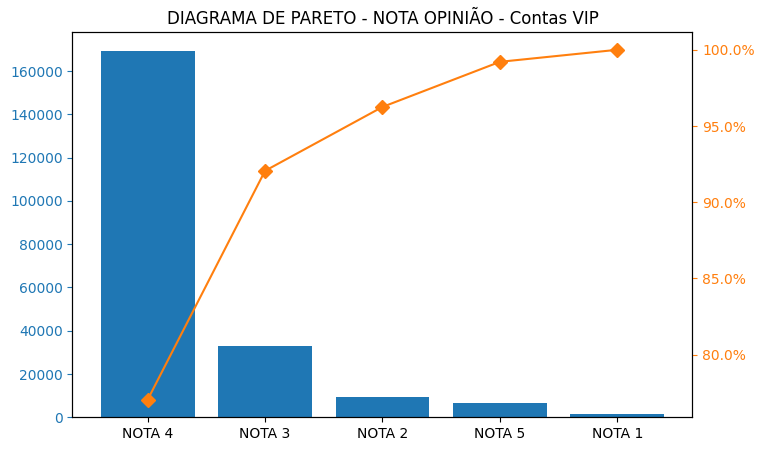


📊 Tabela de Frequências - NOTA OPINIÃO


Categoria  Frequência Absoluta  Frequência Relativa (%)  \
0    NOTA 4               169477                    77.04   
1    NOTA 3                33059                    15.03   
2    NOTA 2                 9216                     4.19   
3    NOTA 5                 6518                     2.96   
4    NOTA 1                 1730                     0.79   

   Frequência Acumulada (%)  
0                     77.04  
1                     92.06  
2                     96.25  
3                     99.21  
4                    100.00

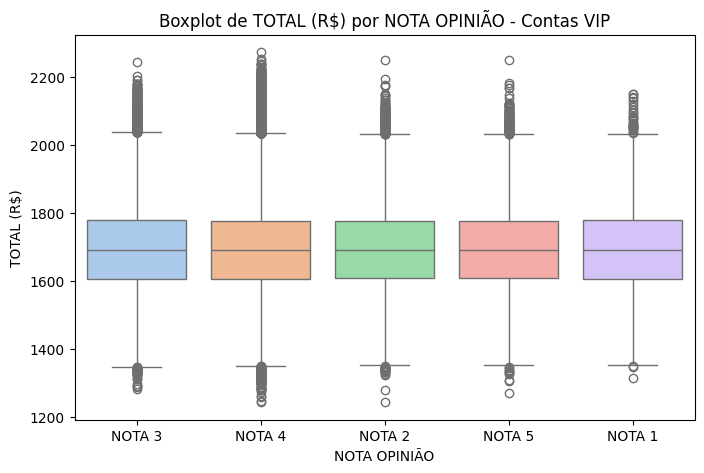



CONTAS PRIME


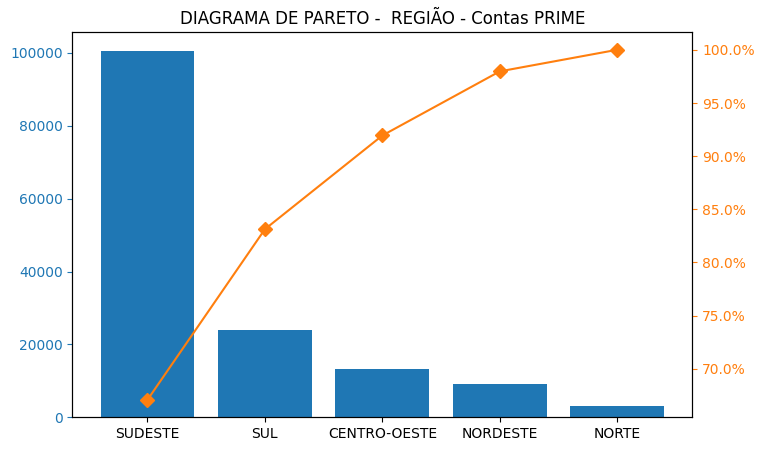


📊 Tabela de Frequências -  REGIÃO


Categoria  Frequência Absoluta  Frequência Relativa (%)  \
0       SUDESTE               100631                    67.09   
1           SUL                24062                    16.04   
2  CENTRO-OESTE                13212                     8.81   
3      NORDESTE                 9052                     6.03   
4         NORTE                 3043                     2.03   

   Frequência Acumulada (%)  
0                     67.09  
1                     83.13  
2                     91.94  
3                     97.97  
4                    100.00

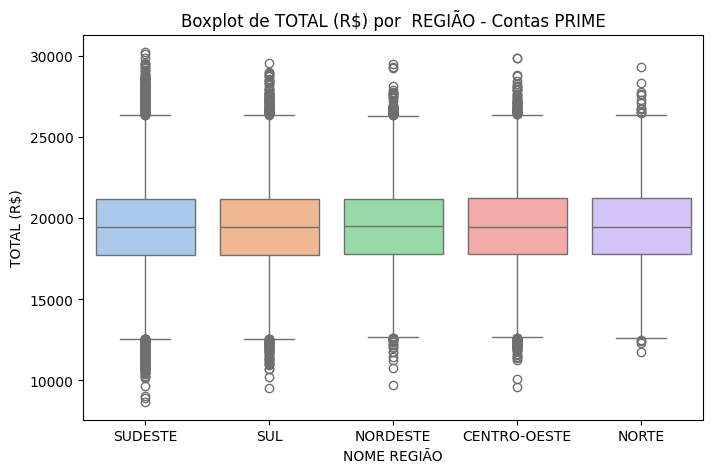

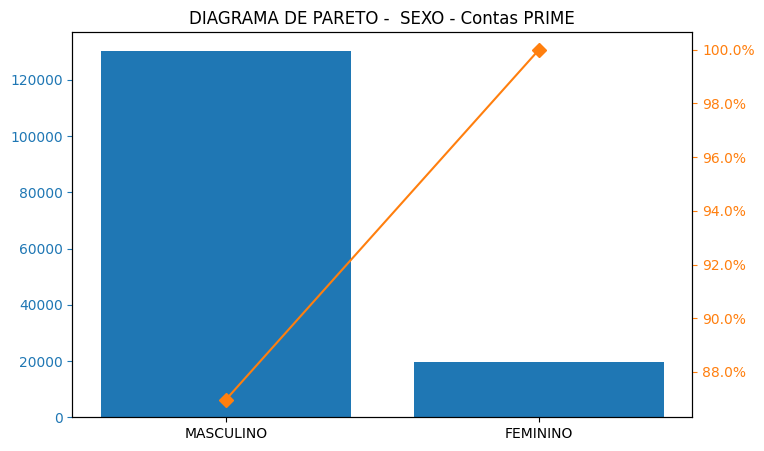


📊 Tabela de Frequências -  SEXO


Categoria  Frequência Absoluta  Frequência Relativa (%)  \
0  MASCULINO               130433                    86.96   
1   FEMININO                19567                    13.04   

   Frequência Acumulada (%)  
0                     86.96  
1                    100.00

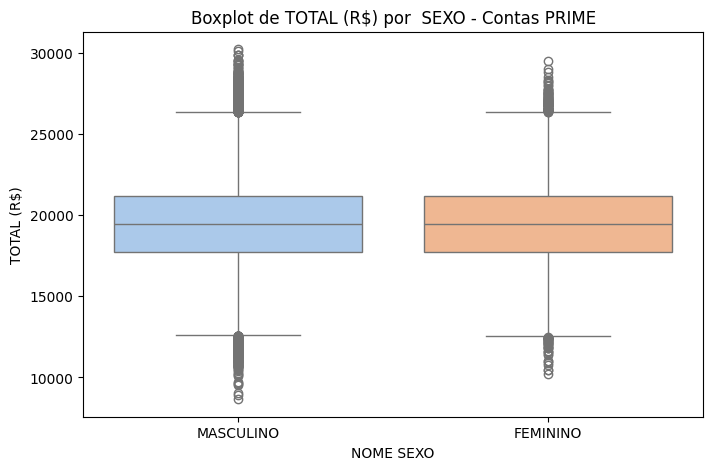

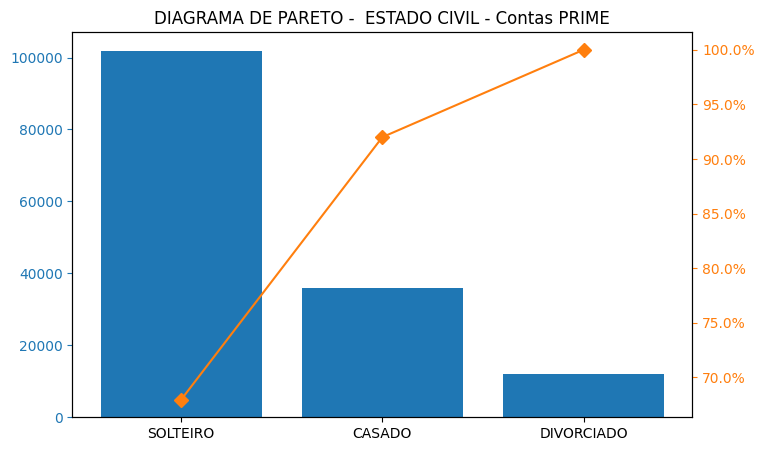


📊 Tabela de Frequências -  ESTADO CIVIL


Categoria  Frequência Absoluta  Frequência Relativa (%)  \
0    SOLTEIRO               101927                    67.95   
1      CASADO                36073                    24.05   
2  DIVORCIADO                12000                     8.00   

   Frequência Acumulada (%)  
0                     67.95  
1                     92.00  
2                    100.00

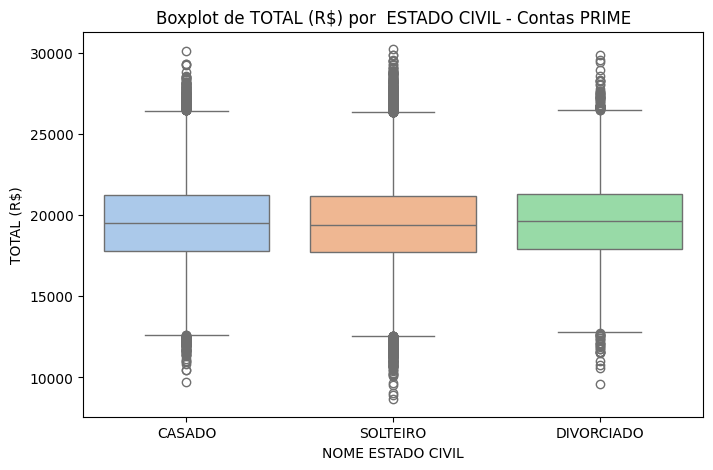

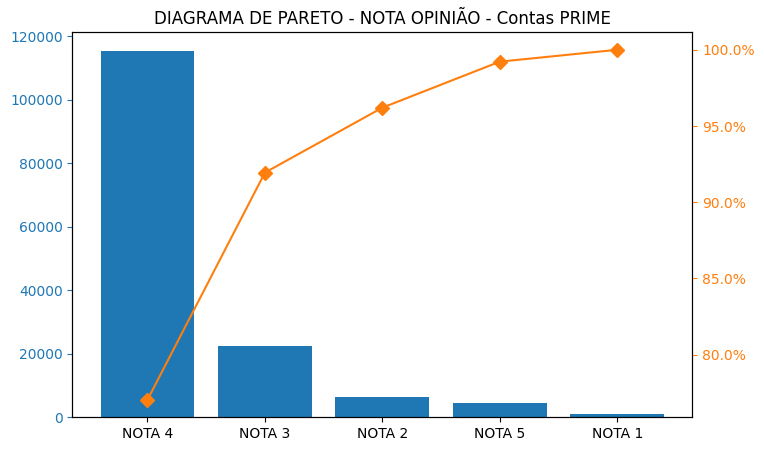


📊 Tabela de Frequências - NOTA OPINIÃO


Categoria  Frequência Absoluta  Frequência Relativa (%)  \
0    NOTA 4               115540                    77.03   
1    NOTA 3                22373                    14.92   
2    NOTA 2                 6380                     4.25   
3    NOTA 5                 4535                     3.02   
4    NOTA 1                 1172                     0.78   

   Frequência Acumulada (%)  
0                     77.03  
1                     91.94  
2                     96.20  
3                     99.22  
4                    100.00

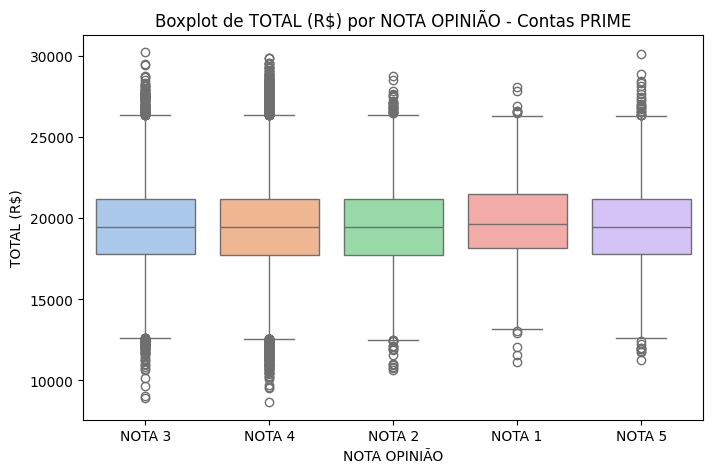

In [42]:
AtividadeA2_2()

In [43]:
help(AtividadeA2_2)

Help on function AtividadeA2_2 in module __main__:

AtividadeA2_2()
    HELP: Solução da etapa A2.2
    Analisa variáveis qualitativas gerando:
      - Frequência absoluta e relativa
      - Gráfico de Pareto
      - Boxplot (relacionando qualitativas com TOTAL (R$))



## Atividade A3: Resultado da Pesquisa de Satisfação

Fazer o resultado da Pesquisa de satisfação do cliente em porcentagem (%):
* Geral
* Por Sexo

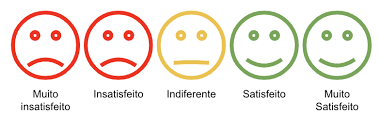

### Atividade A3.1: Discretizar a Variável Qualitativa (OPINIÃO DO CLIENTE)

- Nota 1 \
"Tive uma experiência ruim com a UVVine" \
"Produto chegou atrasado na UVVine" \
"Não gostei do atendimento na UVVine" \
"Senti que faltou qualidade no atendimento da UVVine" 

- Nota 2 \
"Serviço deixou a desejar na UVVine": \
"Foi aceitável, esperava mais da UVVine" \
"Razoável, com margem de melhora no preço médio da UVVine" \
"Atendimento comum, poderia melhorar em cordialidade a UVVine" \
"Experiência regular, não atendeu a política de cashback da UVVine" \
"Nada demais, serviço regular na UVVine" 

- Nota 3 \
"Foi indiferente minha experiência com a UVVine" \
"Compro exponenciamente, opinião neutra sobre UVVine" \
"Não tenho muito a dizer sobre a UVVine" \
"Nada digno de nota com a UVVine" \
"Sem opinião formada sobre a UVVine" 

- Nota 4 \
"Funcionou bem e me atendeu no prazo certo a UVVine" \
"Entrega foi boa e rápida na UVVine" \
"Fiquei satisfeito com o serviço da UVVine" \
"Gostei do atendimento prestado pela UVVine" \
"Serviço eficiente, recomendo o clube:  UVVine" 

- Nota 5 \
"Ótimo! Tudo ocorreu maravilhosamente bem com a  UVVine" \
"Produto perfeito, chegou antes do prazo de previsão. Top demais a UVVine" \
"Serviço impecável, adorei o clube:  UVVine" \
"Excelente experiência, recomendo muito a UVVine" \
"Superou expectativas o atendimento na UVVine" 

In [44]:
def AtividadeA3_1():
    """
    HELP: Solução da etapa A3.1
    A discretização foi feita no início do código, para poder ser utilizado em atividades anteriores.
    """
    return df.loc[:,['OPINIÃO DO CLIENTE','NOTA OPINIÃO','NOTA OPINIÃO NUM']]



In [45]:
AtividadeA3_1()

OPINIÃO DO CLIENTE NOTA OPINIÃO  \
0        Compro exponenciamente, opinião neutra sobre U...       NOTA 3   
1        Compro exponenciamente, opinião neutra sobre U...       NOTA 3   
2           Foi indiferente minha experiência com a UVVine       NOTA 3   
3            Serviço eficiente, recomendo o clube:  UVVine       NOTA 4   
4                Fiquei satisfeito com o serviço da UVVine       NOTA 4   
...                                                    ...          ...   
1119995         Gostei do atendimento prestado pela UVVine       NOTA 4   
1119996         Gostei do atendimento prestado pela UVVine       NOTA 4   
1119997                 Entrega foi boa e rápida na UVVine       NOTA 4   
1119998  Funcionou bem e me atendeu no prazo certo a UV...       NOTA 4   
1119999                    Nada digno de nota com a UVVine       NOTA 3   

         NOTA OPINIÃO NUM  
0                       3  
1                       3  
2                       3  
3                       4  
4                       4  
...                   ...  
1119995                 4  
1119996                 4  
1119997                 4  
1119998                 4  
1119999                 3  

[1120000 rows x 3 columns]

### Atividade A3.2: Análise Bootstrap do resultado da Pesquisa de Satisfação

In [46]:
def analisar_bootstrap_satisfacao(df, coluna="NOTA OPINIÃO NUM", name=None):
    """
    Faz análise bootstrap da pesquisa de satisfação:
      - Erro-Padrão
      - Intervalo de Confiança
      - Gráfico da distribuição bootstrap
    """
    dados = df[coluna]

    # Gerador de números aleatórios fixo (para reprodutibilidade)
    rng = np.random.default_rng()

    # Executa o bootstrap (usando média como métrica)
    res = bootstrap(
        data=(dados,),
        statistic=np.mean,
        confidence_level=0.90,
        random_state=rng
    )

    # Resultados
    se = res.standard_error
    ci_low, ci_high = res.confidence_interval.low, res.confidence_interval.high

    # Exibe resultados
    print(f"📊 RESULTADOS DA ANÁLISE BOOTSTRAP - PESQUISA DE SATISFAÇÃO - {name}")
    print(f"Média das notas      : {np.mean(dados):.2f}")
    print(f"Erro-Padrão (SE)     : {se:.3f}")
    print(f"Intervalo de Confiança 90% : [{ci_low:.2f}, {ci_high:.2f}]")

    # Gráfico
    plt.figure(figsize=(8,5))
    plt.hist(res.bootstrap_distribution, bins=30, color="skyblue", edgecolor="black", alpha=0.7)
    plt.axvline(ci_low, color="red", linestyle="--", label=f"Limite Inferior ({ci_low:.2f})")
    plt.axvline(ci_high, color="red", linestyle="--", label=f"Limite Superior ({ci_high:.2f})")
    plt.axvline(np.mean(dados), color="green", linestyle="-", label=f"Média ({np.mean(dados):.2f})")

    plt.title(f"Distribuição Bootstrap - Pesquisa de Satisfação - {name}")
    plt.xlabel("Média das Notas")
    plt.ylabel("Frequência")
    plt.legend()
    plt.show()


def AtividadeA3_2():
    """
    HELP: Solução da etapa A3.2
    Fazer os Cálculos / Gráficos para determinar:
        - Erro-Padrão
        - Intervalo de Confiança
        - Gráfico da Análise Bootstrap dos resultados da Pesquisa de Satisfação.
    """
    analisar_bootstrap_satisfacao(df_essential.sample(n=1000, replace=False), name="Contas ESSENTIAL")
    analisar_bootstrap_satisfacao(df_vip.sample(n=1000, replace=False), name="Contas VIP")
    analisar_bootstrap_satisfacao(df_prime.sample(n=1000, replace=False), name="Contas PRIME")



📊 RESULTADOS DA ANÁLISE BOOTSTRAP - PESQUISA DE SATISFAÇÃO - Contas ESSENTIAL
Média das notas      : 3.78
Erro-Padrão (SE)     : 0.018
Intervalo de Confiança 90% : [3.74, 3.81]


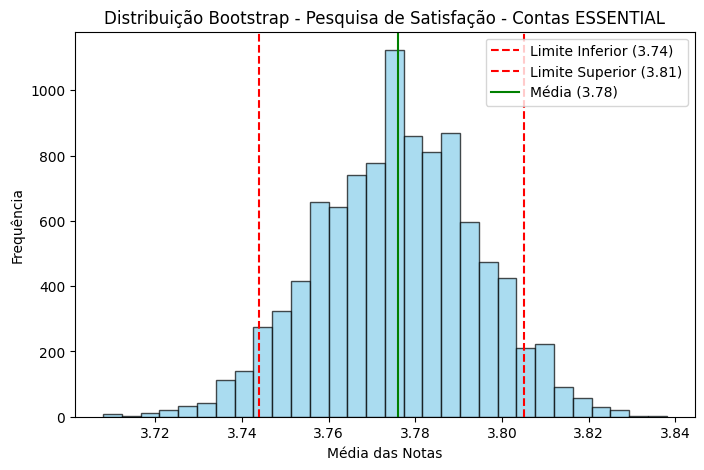

📊 RESULTADOS DA ANÁLISE BOOTSTRAP - PESQUISA DE SATISFAÇÃO - Contas VIP
Média das notas      : 3.77
Erro-Padrão (SE)     : 0.019
Intervalo de Confiança 90% : [3.74, 3.80]


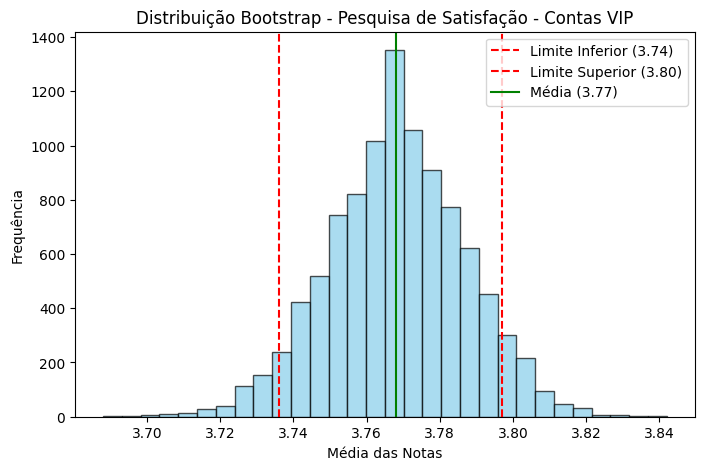

📊 RESULTADOS DA ANÁLISE BOOTSTRAP - PESQUISA DE SATISFAÇÃO - Contas PRIME
Média das notas      : 3.77
Erro-Padrão (SE)     : 0.020
Intervalo de Confiança 90% : [3.74, 3.80]


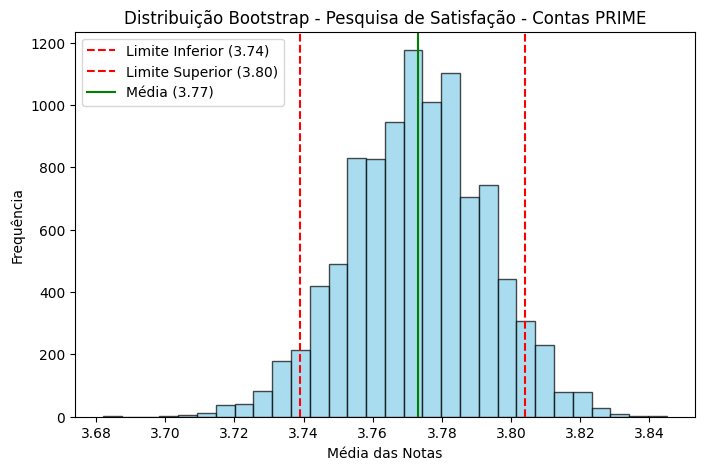

In [47]:
AtividadeA3_2()

In [48]:
help(AtividadeA3_2)

Help on function AtividadeA3_2 in module __main__:

AtividadeA3_2()
    HELP: Solução da etapa A3.2
    Fazer os Cálculos / Gráficos para determinar:
        - Erro-Padrão
        - Intervalo de Confiança
        - Gráfico da Análise Bootstrap dos resultados da Pesquisa de Satisfação.



### Atividade A3.3: Resultado Final da Pesquisa de Satisfação

In [49]:
def resultado_final_satisfacao(df):
    """
    Calcula o resultado final da pesquisa de satisfação:
      - Percentual geral das notas
      - Percentual por sexo
    """

    # GERAL
    geral = df['NOTA OPINIÃO'].value_counts(normalize=True).sort_index() * 100
    geral = geral.rename("Percentual (%)")

    print("=== RESULTADO GERAL ===")
    print(geral.round(2))
    print("\n")

    # POR SEXO
    por_sexo = (
        df.groupby("NOME SEXO")['NOTA OPINIÃO']
        .value_counts(normalize=True)
        .mul(100)
        .rename("Percentual (%)")
        .reset_index()
        .sort_values(["NOME SEXO", "NOTA OPINIÃO"])
    )

    print("=== RESULTADO POR SEXO ===")
    print(por_sexo.to_string(index=False))

    fig, axes = plt.subplots(1, 2, figsize=(12,5))

    # Gráfico geral
    geral.plot(kind="bar", ax=axes[0], color="skyblue", edgecolor="black")
    axes[0].set_title("Resultado Geral da Pesquisa de Satisfação (%)")
    axes[0].set_xlabel("Nota")
    axes[0].set_ylabel("Percentual (%)")
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

    # Gráfico por sexo (stacked bar)
    sexo = por_sexo.pivot(index="NOTA OPINIÃO", columns="NOME SEXO", values="Percentual (%)")
    sexo.plot(kind="bar", ax=axes[1], edgecolor="black")
    axes[1].set_title("Resultado da Pesquisa por Sexo (%)")
    axes[1].set_xlabel("Nota")
    axes[1].set_ylabel("Percentual (%)")
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

    plt.tight_layout()
    plt.show()


def AtividadeA3_3():
    """
    HELP: Solução da etapa A3.3
    Resultado Final da Pesquisa de satisfação do cliente em porcentagem (%):
        - Geral
        - Por Sexo
    """
    print("Contas ESSENTIAL\n")
    resultado_final_satisfacao(df_essential)
    print("\n\nContas VIP\n")
    resultado_final_satisfacao(df_vip)
    print("\n\nContas PRIME\n")
    resultado_final_satisfacao(df_prime)



Contas ESSENTIAL

=== RESULTADO GERAL ===
NOTA OPINIÃO
NOTA 1     0.80
NOTA 2     4.20
NOTA 3    15.01
NOTA 4    76.98
NOTA 5     3.01
Name: Percentual (%), dtype: float64


=== RESULTADO POR SEXO ===
NOME SEXO NOTA OPINIÃO  Percentual (%)
 FEMININO       NOTA 1        0.804050
 FEMININO       NOTA 2        4.216385
 FEMININO       NOTA 3       15.246144
 FEMININO       NOTA 4       76.727732
 FEMININO       NOTA 5        3.005689
MASCULINO       NOTA 1        0.798476
MASCULINO       NOTA 2        4.198781
MASCULINO       NOTA 3       14.973691
MASCULINO       NOTA 4       77.022699
MASCULINO       NOTA 5        3.006353


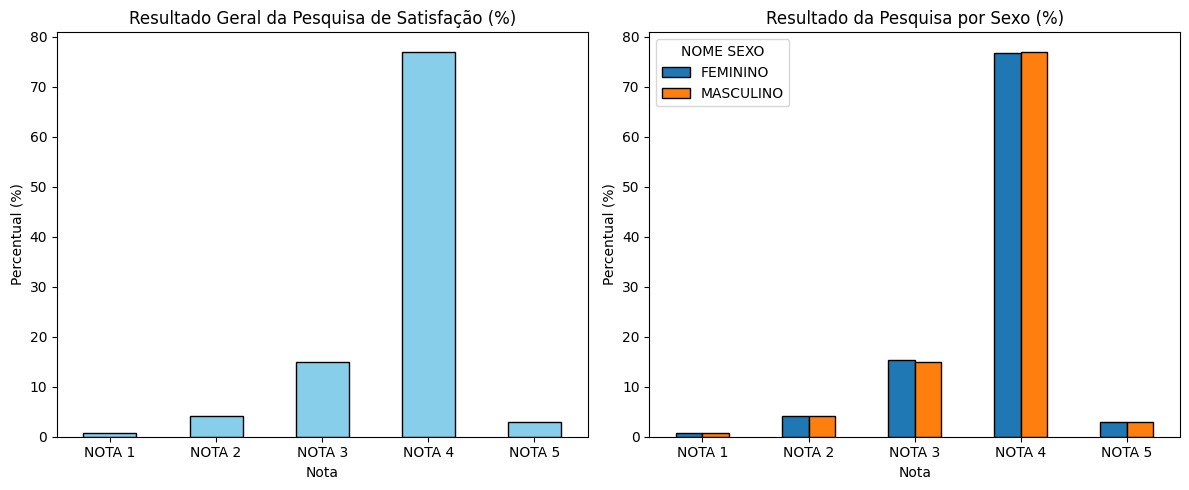



Contas VIP

=== RESULTADO GERAL ===
NOTA OPINIÃO
NOTA 1     0.79
NOTA 2     4.19
NOTA 3    15.03
NOTA 4    77.04
NOTA 5     2.96
Name: Percentual (%), dtype: float64


=== RESULTADO POR SEXO ===
NOME SEXO NOTA OPINIÃO  Percentual (%)
 FEMININO       NOTA 1        0.855453
 FEMININO       NOTA 2        3.932268
 FEMININO       NOTA 3       15.380553
 FEMININO       NOTA 4       76.874604
 FEMININO       NOTA 5        2.957122
MASCULINO       NOTA 1        0.776120
MASCULINO       NOTA 2        4.227168
MASCULINO       NOTA 3       14.974373
MASCULINO       NOTA 4       77.058781
MASCULINO       NOTA 5        2.963558


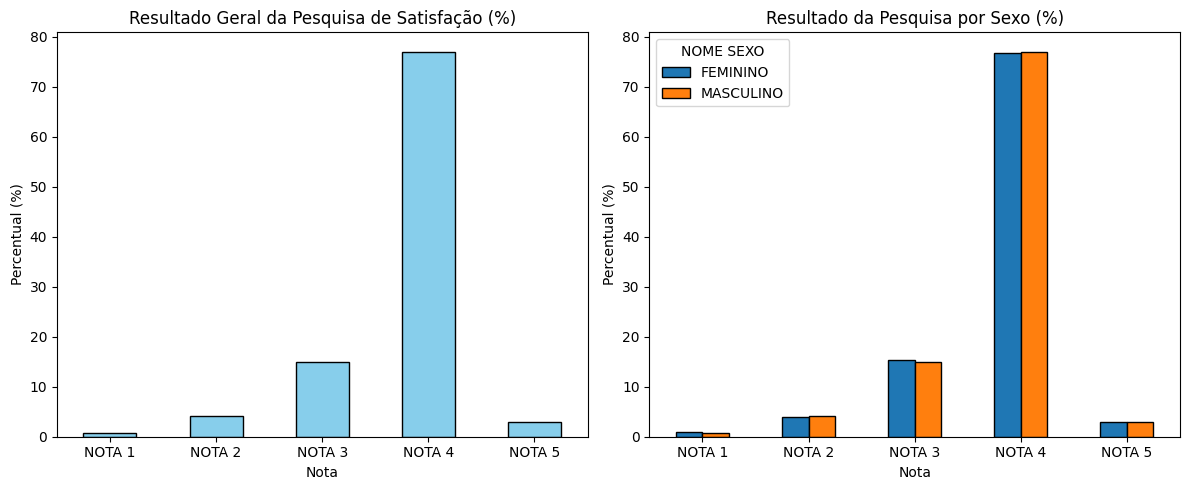



Contas PRIME

=== RESULTADO GERAL ===
NOTA OPINIÃO
NOTA 1     0.78
NOTA 2     4.25
NOTA 3    14.92
NOTA 4    77.03
NOTA 5     3.02
Name: Percentual (%), dtype: float64


=== RESULTADO POR SEXO ===
NOME SEXO NOTA OPINIÃO  Percentual (%)
 FEMININO       NOTA 1        0.781929
 FEMININO       NOTA 2        4.057853
 FEMININO       NOTA 3       14.994634
 FEMININO       NOTA 4       77.088976
 FEMININO       NOTA 5        3.076609
MASCULINO       NOTA 1        0.781244
MASCULINO       NOTA 2        4.282659
MASCULINO       NOTA 3       14.903437
MASCULINO       NOTA 4       77.017319
MASCULINO       NOTA 5        3.015341


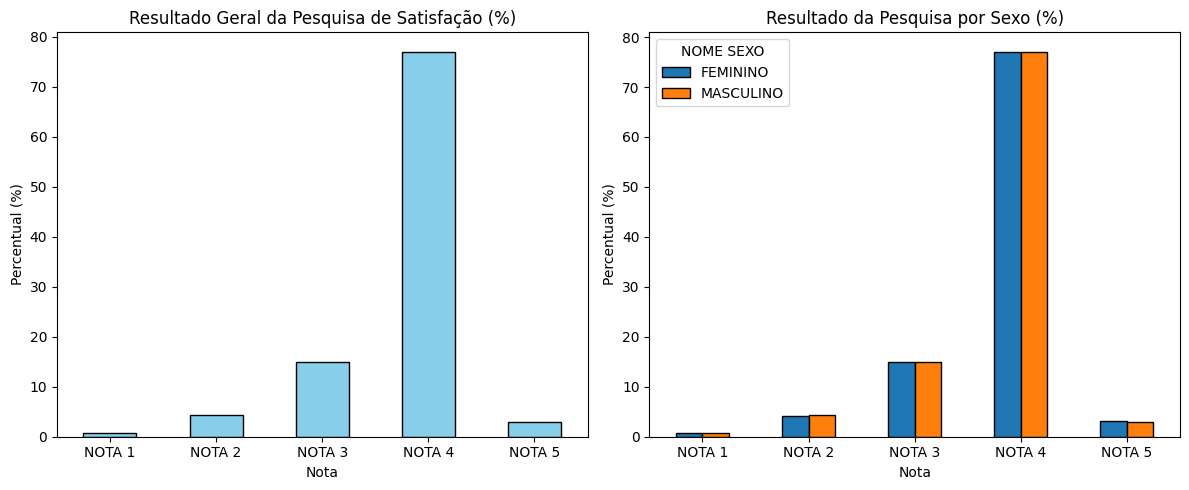

In [50]:
AtividadeA3_3()

# RELATÓRIO FINAL - PARTE 1

Fazer aqui o **RELATÓRIO FINAL - PARTE 1** com todas as conclusões e resultados que serão apresentados as gestores da **EMPRESA: UVVine**.